<a href="https://colab.research.google.com/github/Byeon-MJ/EveryOnes_AI_DL/blob/main/mnist_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.datasets import mnist
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

### 데이터 불러오기

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5)/127.5

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
mnist_data = x_train.reshape(60000, 784)
print(mnist_data.shape)
len(mnist_data)

(60000, 784)


60000

### 생성자 만들기

In [ ]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=256, input_dim=100))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(units=784, activation='tanh'))
    return generator

In [ ]:
g = create_generator()
g.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 784)               402192    
                                                                 
Total params: 559,632
Trainable params: 559,632
Non-trainable params: 0
_________________________________________________________________


### 판별자 만들기

In [ ]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units=512, input_dim = 784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(units=1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer = Adam(lr=0.0002, beta_1=0.5))
    return discriminator
    

In [ ]:
d = create_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### GAN 생성함수 만들기

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

In [ ]:
gan = create_gan(d, g)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               559632    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 533505    
                                                                 
Total params: 1,093,137
Trainable params: 559,632
Non-trainable params: 533,505
_________________________________________________________________


### 결과 확인

In [ ]:
def plot_generated_images(generator):
    noise = np.random.normal(loc=0, scale=1, size=[100, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100, 28, 28)
    plt.figure(figsize=(10, 10))
    for i in range(generated_images.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()

### 모델 학습

In [ ]:
batch_size = 128
epochs = 5000

  0%|          | 0/5000 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/5000 [00:05<7:09:24,  5.15s/it]

4/4 [==============================] - 0s 2ms/step


  0%|          | 3/5000 [00:05<1:55:26,  1.39s/it]

4/4 [==============================] - 0s 2ms/step


  0%|          | 5/5000 [00:05<58:42,  1.42it/s]  

4/4 [==============================] - 0s 2ms/step


  0%|          | 7/5000 [00:05<36:44,  2.26it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 9/5000 [00:05<24:45,  3.36it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 11/5000 [00:05<17:43,  4.69it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 13/5000 [00:05<13:35,  6.11it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 15/5000 [00:06<10:59,  7.56it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 17/5000 [00:06<09:10,  9.06it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 19/5000 [00:06<07:47, 10.66it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 21/5000 [00:06<07:03, 11.77it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 23/5000 [00:06<06:30, 12.75it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 25/5000 [00:06<06:07, 13.54it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 27/5000 [00:06<05:43, 14.48it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 29/5000 [00:06<05:35, 14.83it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 31/5000 [00:07<05:22, 15.41it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 33/5000 [00:07<05:23, 15.35it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 35/5000 [00:07<05:17, 15.62it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 37/5000 [00:07<05:21, 15.44it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 39/5000 [00:07<05:24, 15.27it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 41/5000 [00:07<05:21, 15.40it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 43/5000 [00:07<05:15, 15.72it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 45/5000 [00:07<05:20, 15.47it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 47/5000 [00:08<05:23, 15.29it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 49/5000 [00:08<05:23, 15.33it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 51/5000 [00:08<05:22, 15.33it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 53/5000 [00:08<05:54, 13.96it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 55/5000 [00:08<05:37, 14.64it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 57/5000 [00:08<05:24, 15.23it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 59/5000 [00:08<05:16, 15.63it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 61/5000 [00:09<05:18, 15.51it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 63/5000 [00:09<05:09, 15.97it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 65/5000 [00:09<05:09, 15.93it/s]

4/4 [==============================] - 0s 2ms/step


  1%|▏         | 67/5000 [00:09<05:07, 16.06it/s]

4/4 [==============================] - 0s 2ms/step


  1%|▏         | 69/5000 [00:09<05:13, 15.74it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 71/5000 [00:09<05:07, 16.04it/s]

4/4 [==============================] - 0s 2ms/step


  1%|▏         | 73/5000 [00:09<05:11, 15.82it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 75/5000 [00:09<05:15, 15.61it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 77/5000 [00:10<05:14, 15.66it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 79/5000 [00:10<05:14, 15.63it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 81/5000 [00:10<05:15, 15.60it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 83/5000 [00:10<05:14, 15.65it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 85/5000 [00:10<05:15, 15.56it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 87/5000 [00:10<05:05, 16.06it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 89/5000 [00:10<05:08, 15.94it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 91/5000 [00:10<05:09, 15.86it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 93/5000 [00:11<05:12, 15.70it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 95/5000 [00:11<05:07, 15.94it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 97/5000 [00:11<05:07, 15.96it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 99/5000 [00:11<05:05, 16.04it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 101/5000 [00:11<05:08, 15.89it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 103/5000 [00:11<05:11, 15.70it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 105/5000 [00:11<05:07, 15.94it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 107/5000 [00:11<05:00, 16.26it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 109/5000 [00:12<05:08, 15.88it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 111/5000 [00:12<05:06, 15.94it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 113/5000 [00:12<05:01, 16.20it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 115/5000 [00:12<05:04, 16.04it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 117/5000 [00:12<05:14, 15.51it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 119/5000 [00:12<05:10, 15.71it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 121/5000 [00:12<05:15, 15.48it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 123/5000 [00:12<05:16, 15.39it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▎         | 125/5000 [00:13<05:18, 15.32it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 127/5000 [00:13<05:10, 15.67it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 129/5000 [00:13<05:13, 15.55it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 131/5000 [00:13<05:16, 15.37it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 133/5000 [00:13<05:14, 15.47it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 135/5000 [00:13<05:09, 15.73it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 137/5000 [00:13<05:17, 15.30it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 139/5000 [00:13<05:16, 15.38it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 141/5000 [00:14<05:16, 15.37it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 143/5000 [00:14<05:10, 15.63it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 145/5000 [00:14<05:12, 15.55it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 147/5000 [00:14<05:07, 15.78it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 149/5000 [00:14<05:09, 15.65it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 151/5000 [00:14<05:15, 15.37it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 153/5000 [00:14<05:13, 15.44it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 155/5000 [00:14<05:05, 15.85it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 157/5000 [00:15<05:07, 15.76it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 159/5000 [00:15<05:10, 15.57it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 161/5000 [00:15<05:04, 15.90it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 163/5000 [00:15<05:44, 14.04it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 165/5000 [00:15<05:30, 14.61it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 167/5000 [00:15<05:17, 15.23it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 169/5000 [00:15<05:05, 15.79it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 171/5000 [00:16<05:06, 15.77it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 173/5000 [00:16<04:59, 16.12it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 175/5000 [00:16<04:59, 16.09it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▎         | 177/5000 [00:16<04:57, 16.24it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▎         | 179/5000 [00:16<05:02, 15.93it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▎         | 181/5000 [00:16<05:18, 15.15it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 183/5000 [00:16<05:19, 15.06it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 185/5000 [00:16<05:21, 14.97it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 187/5000 [00:17<05:15, 15.26it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▍         | 189/5000 [00:17<05:10, 15.49it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 191/5000 [00:17<05:12, 15.40it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▍         | 193/5000 [00:17<05:04, 15.80it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 195/5000 [00:17<05:10, 15.48it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 197/5000 [00:17<05:09, 15.53it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 199/5000 [00:17<05:01, 15.92it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 201/5000 [00:17<05:02, 15.89it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 203/5000 [00:18<05:02, 15.85it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▍         | 205/5000 [00:18<04:56, 16.18it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 207/5000 [00:18<05:04, 15.76it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 209/5000 [00:18<05:05, 15.70it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▍         | 211/5000 [00:18<05:15, 15.16it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 213/5000 [00:18<05:12, 15.33it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 215/5000 [00:18<05:12, 15.30it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 217/5000 [00:19<05:16, 15.11it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 219/5000 [00:19<05:08, 15.52it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▍         | 221/5000 [00:19<04:58, 16.00it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 223/5000 [00:19<04:58, 16.01it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▍         | 225/5000 [00:19<05:02, 15.77it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 227/5000 [00:19<05:07, 15.54it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 229/5000 [00:19<05:05, 15.61it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 231/5000 [00:19<05:04, 15.67it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 233/5000 [00:20<05:01, 15.80it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 235/5000 [00:20<04:57, 16.03it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 237/5000 [00:20<04:55, 16.11it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 239/5000 [00:20<04:57, 16.03it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 241/5000 [00:20<04:52, 16.24it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 243/5000 [00:20<04:54, 16.17it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 245/5000 [00:20<04:59, 15.90it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 247/5000 [00:20<04:56, 16.06it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 249/5000 [00:21<04:59, 15.86it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▌         | 251/5000 [00:21<05:29, 14.42it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 253/5000 [00:21<05:19, 14.88it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 255/5000 [00:21<05:11, 15.25it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 257/5000 [00:21<05:05, 15.53it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 259/5000 [00:21<05:14, 15.05it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▌         | 261/5000 [00:21<05:07, 15.39it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 263/5000 [00:21<05:02, 15.66it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 265/5000 [00:22<04:59, 15.79it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 267/5000 [00:22<04:59, 15.79it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 269/5000 [00:22<04:57, 15.91it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▌         | 271/5000 [00:22<04:56, 15.94it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▌         | 273/5000 [00:22<04:52, 16.16it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 275/5000 [00:22<04:48, 16.38it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 277/5000 [00:22<04:54, 16.04it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 279/5000 [00:22<04:59, 15.78it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 281/5000 [00:23<05:30, 14.28it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 283/5000 [00:23<05:26, 14.44it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 285/5000 [00:23<05:16, 14.88it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 287/5000 [00:23<05:19, 14.76it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 289/5000 [00:23<05:12, 15.07it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 291/5000 [00:23<05:21, 14.63it/s]

4/4 [==============================] - 0s 2ms/step


  6%|▌         | 293/5000 [00:23<05:15, 14.90it/s]

4/4 [==============================] - 0s 2ms/step


  6%|▌         | 295/5000 [00:24<05:13, 15.01it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 297/5000 [00:24<05:09, 15.20it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 299/5000 [00:24<05:09, 15.16it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 301/5000 [00:24<05:07, 15.29it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 303/5000 [00:24<05:06, 15.32it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 305/5000 [00:24<05:05, 15.37it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 307/5000 [00:24<05:10, 15.09it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 309/5000 [00:24<05:11, 15.07it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 311/5000 [00:25<05:10, 15.08it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 313/5000 [00:25<05:05, 15.34it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 315/5000 [00:25<05:01, 15.51it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 317/5000 [00:25<05:00, 15.61it/s]

4/4 [==============================] - 0s 5ms/step


  6%|▋         | 319/5000 [00:25<05:42, 13.68it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 321/5000 [00:25<05:32, 14.06it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 323/5000 [00:25<05:20, 14.57it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 325/5000 [00:26<05:12, 14.95it/s]

4/4 [==============================] - 0s 2ms/step


  7%|▋         | 327/5000 [00:26<05:12, 14.96it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 329/5000 [00:26<05:09, 15.08it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 331/5000 [00:26<05:03, 15.37it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 333/5000 [00:26<05:00, 15.55it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 335/5000 [00:26<04:58, 15.64it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 337/5000 [00:26<05:06, 15.20it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 339/5000 [00:26<05:00, 15.51it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 341/5000 [00:27<05:00, 15.50it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 343/5000 [00:27<05:01, 15.43it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 345/5000 [00:27<05:02, 15.40it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 347/5000 [00:27<04:58, 15.61it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 349/5000 [00:27<04:59, 15.51it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 351/5000 [00:27<05:07, 15.10it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 353/5000 [00:27<05:10, 14.97it/s]

4/4 [==============================] - 0s 2ms/step


  7%|▋         | 355/5000 [00:27<05:10, 14.97it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 357/5000 [00:28<05:04, 15.27it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 359/5000 [00:28<04:54, 15.74it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 361/5000 [00:28<04:56, 15.67it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 363/5000 [00:28<04:57, 15.58it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 365/5000 [00:28<05:02, 15.31it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 367/5000 [00:28<05:00, 15.44it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 369/5000 [00:28<05:34, 13.85it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 371/5000 [00:29<05:23, 14.31it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 373/5000 [00:29<05:15, 14.69it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 375/5000 [00:29<05:21, 14.37it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 377/5000 [00:29<05:16, 14.59it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 379/5000 [00:29<05:17, 14.57it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 381/5000 [00:29<05:41, 13.51it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 383/5000 [00:29<05:35, 13.78it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 385/5000 [00:30<05:28, 14.06it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 387/5000 [00:30<05:48, 13.25it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 389/5000 [00:30<05:30, 13.95it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 391/5000 [00:30<05:17, 14.50it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 393/5000 [00:30<05:11, 14.78it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 395/5000 [00:30<05:07, 14.99it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 397/5000 [00:30<05:17, 14.50it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 399/5000 [00:31<05:51, 13.10it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 401/5000 [00:31<05:38, 13.58it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 403/5000 [00:31<05:32, 13.83it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 405/5000 [00:31<05:26, 14.08it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 407/5000 [00:31<05:28, 13.98it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 409/5000 [00:31<05:17, 14.47it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 411/5000 [00:31<05:17, 14.44it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 413/5000 [00:32<05:12, 14.66it/s]

4/4 [==============================] - 0s 2ms/step


  8%|▊         | 415/5000 [00:32<05:02, 15.17it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 417/5000 [00:32<04:58, 15.33it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 419/5000 [00:32<05:06, 14.94it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 421/5000 [00:32<05:04, 15.03it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 423/5000 [00:32<05:03, 15.10it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 425/5000 [00:32<05:08, 14.84it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▊         | 427/5000 [00:32<05:10, 14.74it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▊         | 429/5000 [00:33<05:08, 14.80it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▊         | 431/5000 [00:33<05:13, 14.56it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▊         | 433/5000 [00:33<05:36, 13.57it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▊         | 435/5000 [00:33<05:23, 14.11it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▊         | 437/5000 [00:33<05:12, 14.60it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 439/5000 [00:33<05:16, 14.42it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 441/5000 [00:33<05:18, 14.33it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 443/5000 [00:34<05:14, 14.48it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 445/5000 [00:34<05:05, 14.90it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 447/5000 [00:34<05:03, 14.99it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 449/5000 [00:34<05:06, 14.87it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 451/5000 [00:34<05:34, 13.60it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 453/5000 [00:34<05:20, 14.19it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 455/5000 [00:34<05:12, 14.56it/s]

4/4 [==============================] - 0s 2ms/step


  9%|▉         | 457/5000 [00:35<05:15, 14.39it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 459/5000 [00:35<05:05, 14.88it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 461/5000 [00:35<05:01, 15.03it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 463/5000 [00:35<05:02, 15.00it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 465/5000 [00:35<05:03, 14.93it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 467/5000 [00:35<05:01, 15.01it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 469/5000 [00:35<04:57, 15.23it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 471/5000 [00:35<05:06, 14.79it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 473/5000 [00:36<05:08, 14.69it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 475/5000 [00:36<05:02, 14.95it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 477/5000 [00:36<04:58, 15.13it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 479/5000 [00:36<04:59, 15.07it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 481/5000 [00:36<04:56, 15.22it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 483/5000 [00:36<04:58, 15.12it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 485/5000 [00:36<05:04, 14.83it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 487/5000 [00:37<05:03, 14.88it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 489/5000 [00:37<04:59, 15.04it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 491/5000 [00:37<04:56, 15.21it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 493/5000 [00:37<05:02, 14.92it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 495/5000 [00:37<04:58, 15.09it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 497/5000 [00:37<05:02, 14.88it/s]

4/4 [==============================] - 0s 5ms/step


 10%|▉         | 499/5000 [00:37<05:29, 13.65it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 501/5000 [00:38<05:21, 14.00it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 503/5000 [00:38<05:18, 14.13it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 505/5000 [00:38<05:19, 14.05it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 507/5000 [00:38<05:15, 14.24it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 509/5000 [00:38<05:10, 14.46it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 511/5000 [00:38<05:03, 14.81it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 513/5000 [00:38<05:29, 13.62it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 515/5000 [00:39<05:54, 12.64it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 517/5000 [00:39<05:40, 13.15it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 519/5000 [00:39<05:25, 13.78it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 521/5000 [00:39<05:13, 14.28it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 523/5000 [00:39<05:08, 14.51it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 525/5000 [00:39<05:06, 14.62it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 527/5000 [00:39<05:04, 14.68it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 529/5000 [00:39<04:58, 14.96it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 531/5000 [00:40<05:01, 14.85it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 533/5000 [00:40<05:04, 14.68it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 535/5000 [00:40<05:04, 14.67it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█         | 537/5000 [00:40<05:05, 14.60it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 539/5000 [00:40<05:06, 14.53it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 541/5000 [00:40<05:01, 14.77it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 543/5000 [00:40<04:54, 15.14it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 545/5000 [00:41<04:56, 15.02it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 547/5000 [00:41<05:23, 13.79it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 549/5000 [00:41<05:19, 13.94it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 551/5000 [00:41<05:14, 14.16it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 553/5000 [00:41<05:09, 14.36it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 555/5000 [00:41<04:59, 14.87it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 557/5000 [00:41<04:59, 14.83it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 559/5000 [00:42<04:57, 14.93it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 561/5000 [00:42<05:03, 14.60it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 563/5000 [00:42<05:29, 13.48it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 565/5000 [00:42<05:53, 12.54it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 567/5000 [00:42<05:36, 13.18it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 569/5000 [00:42<05:26, 13.59it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 571/5000 [00:42<05:12, 14.19it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 573/5000 [00:43<05:12, 14.15it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 575/5000 [00:43<05:11, 14.19it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 577/5000 [00:43<05:06, 14.45it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 579/5000 [00:43<05:04, 14.53it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 581/5000 [00:43<04:56, 14.90it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 583/5000 [00:43<04:57, 14.87it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 585/5000 [00:43<04:54, 15.00it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 587/5000 [00:43<04:52, 15.07it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 589/5000 [00:44<05:01, 14.63it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 591/5000 [00:44<04:59, 14.72it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 593/5000 [00:44<05:05, 14.44it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 595/5000 [00:44<05:02, 14.58it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 597/5000 [00:44<05:00, 14.67it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 599/5000 [00:44<05:28, 13.41it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 601/5000 [00:45<07:55,  9.24it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 603/5000 [00:45<06:58, 10.50it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 605/5000 [00:45<06:21, 11.51it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 607/5000 [00:45<05:51, 12.49it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 609/5000 [00:45<05:34, 13.12it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 611/5000 [00:45<05:23, 13.58it/s]

4/4 [==============================] - 0s 6ms/step


 12%|█▏        | 613/5000 [00:46<05:17, 13.83it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 615/5000 [00:46<05:10, 14.13it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 617/5000 [00:46<05:00, 14.60it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 619/5000 [00:46<04:58, 14.66it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 621/5000 [00:46<04:58, 14.65it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 623/5000 [00:46<04:56, 14.74it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▎        | 625/5000 [00:46<05:24, 13.49it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 627/5000 [00:47<05:11, 14.03it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 629/5000 [00:47<05:31, 13.18it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 631/5000 [00:47<05:25, 13.42it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 633/5000 [00:47<05:13, 13.93it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 635/5000 [00:47<05:31, 13.17it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 637/5000 [00:47<05:18, 13.68it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 639/5000 [00:47<05:10, 14.05it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 641/5000 [00:48<05:03, 14.37it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 643/5000 [00:48<05:07, 14.16it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 645/5000 [00:48<05:28, 13.24it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 647/5000 [00:48<05:18, 13.66it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 649/5000 [00:48<05:06, 14.21it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 651/5000 [00:48<05:28, 13.26it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 653/5000 [00:48<05:22, 13.50it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 655/5000 [00:49<05:15, 13.76it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 657/5000 [00:49<05:10, 13.97it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 659/5000 [00:49<05:04, 14.27it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 661/5000 [00:49<05:09, 14.03it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 663/5000 [00:49<05:19, 13.58it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 665/5000 [00:49<05:12, 13.85it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 667/5000 [00:49<05:13, 13.81it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 669/5000 [00:50<05:32, 13.01it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 671/5000 [00:50<05:25, 13.31it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 673/5000 [00:50<05:09, 13.97it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 675/5000 [00:50<05:06, 14.13it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 677/5000 [00:50<05:05, 14.14it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 679/5000 [00:50<05:04, 14.21it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 681/5000 [00:50<04:56, 14.58it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 683/5000 [00:51<04:49, 14.89it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 685/5000 [00:51<04:50, 14.85it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 687/5000 [00:51<04:54, 14.65it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 689/5000 [00:51<04:50, 14.84it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 691/5000 [00:51<04:50, 14.83it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 693/5000 [00:51<05:13, 13.73it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 695/5000 [00:51<05:06, 14.07it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 697/5000 [00:52<05:26, 13.18it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 699/5000 [00:52<05:12, 13.75it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 701/5000 [00:52<05:12, 13.76it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 703/5000 [00:52<05:00, 14.30it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 705/5000 [00:52<04:55, 14.52it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 707/5000 [00:52<04:53, 14.62it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 709/5000 [00:52<05:22, 13.29it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 711/5000 [00:53<05:09, 13.87it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 713/5000 [00:53<04:59, 14.32it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 715/5000 [00:53<05:04, 14.09it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 717/5000 [00:53<04:58, 14.35it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 719/5000 [00:53<04:51, 14.69it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 721/5000 [00:53<04:49, 14.77it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 723/5000 [00:53<04:46, 14.95it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 725/5000 [00:53<04:47, 14.88it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 727/5000 [00:54<04:46, 14.92it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 729/5000 [00:54<04:41, 15.17it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 731/5000 [00:54<04:43, 15.03it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 733/5000 [00:54<04:42, 15.12it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 735/5000 [00:54<05:09, 13.79it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 737/5000 [00:54<05:04, 13.98it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 739/5000 [00:54<05:03, 14.05it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 741/5000 [00:55<04:58, 14.25it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 743/5000 [00:55<05:28, 12.98it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 745/5000 [00:55<05:16, 13.45it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 747/5000 [00:55<05:04, 13.94it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 749/5000 [00:55<04:57, 14.29it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 751/5000 [00:55<04:52, 14.54it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 753/5000 [00:55<04:52, 14.54it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 755/5000 [00:56<05:18, 13.33it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 757/5000 [00:56<05:08, 13.76it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 759/5000 [00:56<05:07, 13.79it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 761/5000 [00:56<05:00, 14.09it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 763/5000 [00:56<04:55, 14.33it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 765/5000 [00:56<05:19, 13.26it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 767/5000 [00:57<05:07, 13.74it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 769/5000 [00:57<05:05, 13.86it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 771/5000 [00:57<05:05, 13.85it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▌        | 773/5000 [00:57<05:03, 13.91it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 775/5000 [00:57<05:24, 13.02it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 777/5000 [00:57<05:10, 13.62it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 779/5000 [00:57<05:27, 12.90it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 781/5000 [00:58<06:08, 11.46it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 783/5000 [00:58<05:42, 12.31it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 785/5000 [00:58<05:29, 12.81it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 787/5000 [00:58<05:40, 12.37it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 789/5000 [00:58<05:25, 12.92it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 791/5000 [00:58<05:18, 13.21it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 793/5000 [00:58<05:07, 13.68it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 795/5000 [00:59<05:00, 14.02it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 797/5000 [00:59<04:55, 14.23it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 799/5000 [00:59<04:53, 14.30it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 801/5000 [00:59<05:14, 13.34it/s]

4/4 [==============================] - 0s 2ms/step


 16%|█▌        | 803/5000 [00:59<05:10, 13.54it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 805/5000 [00:59<05:27, 12.79it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 807/5000 [01:00<05:15, 13.29it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 809/5000 [01:00<05:02, 13.86it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 811/5000 [01:00<05:50, 11.94it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 813/5000 [01:00<05:57, 11.71it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 815/5000 [01:00<05:31, 12.61it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▋        | 817/5000 [01:00<05:38, 12.37it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 819/5000 [01:00<05:21, 13.02it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 821/5000 [01:01<05:06, 13.65it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 823/5000 [01:01<05:00, 13.92it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 825/5000 [01:01<05:04, 13.70it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 827/5000 [01:01<05:11, 13.41it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 829/5000 [01:01<05:06, 13.62it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 831/5000 [01:01<05:10, 13.41it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 833/5000 [01:02<05:05, 13.63it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 835/5000 [01:02<05:02, 13.76it/s]

4/4 [==============================] - 0s 6ms/step


 17%|█▋        | 837/5000 [01:02<05:23, 12.88it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 839/5000 [01:02<05:14, 13.25it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 841/5000 [01:02<05:00, 13.84it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 843/5000 [01:02<04:51, 14.26it/s]

4/4 [==============================] - 0s 2ms/step


 17%|█▋        | 845/5000 [01:02<04:50, 14.30it/s]

4/4 [==============================] - 0s 5ms/step


 17%|█▋        | 847/5000 [01:03<05:16, 13.14it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 849/5000 [01:03<05:01, 13.76it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 851/5000 [01:03<04:53, 14.15it/s]

4/4 [==============================] - 0s 5ms/step


 17%|█▋        | 853/5000 [01:03<05:13, 13.24it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 855/5000 [01:03<05:10, 13.36it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 857/5000 [01:03<05:02, 13.70it/s]

4/4 [==============================] - 0s 2ms/step


 17%|█▋        | 859/5000 [01:03<04:53, 14.09it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 861/5000 [01:04<04:48, 14.36it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 863/5000 [01:04<05:09, 13.35it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 865/5000 [01:04<05:03, 13.63it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 867/5000 [01:04<04:58, 13.84it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 869/5000 [01:04<04:58, 13.84it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 871/5000 [01:04<04:52, 14.09it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 873/5000 [01:04<04:48, 14.33it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 875/5000 [01:05<04:48, 14.30it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 877/5000 [01:05<04:48, 14.30it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 879/5000 [01:05<04:41, 14.62it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 881/5000 [01:05<04:38, 14.80it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 883/5000 [01:05<04:43, 14.51it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 885/5000 [01:05<04:46, 14.37it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 887/5000 [01:05<05:07, 13.37it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 889/5000 [01:06<05:08, 13.33it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 891/5000 [01:06<05:23, 12.69it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 893/5000 [01:06<05:09, 13.27it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 895/5000 [01:06<05:27, 12.55it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 897/5000 [01:06<05:12, 13.11it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 899/5000 [01:06<05:24, 12.64it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 901/5000 [01:07<05:35, 12.22it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 903/5000 [01:07<05:15, 12.99it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 905/5000 [01:07<05:04, 13.46it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 907/5000 [01:07<04:51, 14.02it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 909/5000 [01:07<04:56, 13.81it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 911/5000 [01:07<04:51, 14.03it/s]

4/4 [==============================] - 0s 6ms/step


 18%|█▊        | 913/5000 [01:07<05:11, 13.11it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 915/5000 [01:08<05:01, 13.56it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 917/5000 [01:08<04:52, 13.96it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 919/5000 [01:08<04:50, 14.05it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 921/5000 [01:08<05:08, 13.24it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 923/5000 [01:08<04:58, 13.67it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 925/5000 [01:08<04:52, 13.92it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 927/5000 [01:08<04:43, 14.38it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 929/5000 [01:09<04:41, 14.48it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 931/5000 [01:09<04:39, 14.57it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 933/5000 [01:09<04:37, 14.64it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▊        | 935/5000 [01:09<04:30, 15.05it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 937/5000 [01:09<04:29, 15.08it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 939/5000 [01:09<04:40, 14.46it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 941/5000 [01:09<04:48, 14.07it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 943/5000 [01:10<05:11, 13.02it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 945/5000 [01:10<05:25, 12.47it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 947/5000 [01:10<05:10, 13.05it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 949/5000 [01:10<05:22, 12.56it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 951/5000 [01:10<05:35, 12.07it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 953/5000 [01:10<05:18, 12.69it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 955/5000 [01:10<05:05, 13.26it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 957/5000 [01:11<04:55, 13.68it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 959/5000 [01:11<05:12, 12.95it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▉        | 961/5000 [01:11<04:58, 13.55it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 963/5000 [01:11<04:55, 13.66it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 965/5000 [01:11<05:11, 12.94it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 967/5000 [01:11<05:21, 12.54it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 969/5000 [01:12<05:12, 12.89it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 971/5000 [01:12<05:01, 13.36it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 973/5000 [01:12<04:53, 13.70it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 975/5000 [01:12<04:45, 14.10it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 977/5000 [01:12<05:12, 12.87it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 979/5000 [01:12<05:28, 12.24it/s]

4/4 [==============================] - 0s 2ms/step


 20%|█▉        | 981/5000 [01:12<05:12, 12.88it/s]

4/4 [==============================] - 0s 6ms/step


 20%|█▉        | 983/5000 [01:13<05:49, 11.51it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 985/5000 [01:13<05:28, 12.22it/s]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 987/5000 [01:13<05:14, 12.75it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 989/5000 [01:13<05:07, 13.03it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 991/5000 [01:13<05:24, 12.36it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 993/5000 [01:13<05:12, 12.84it/s]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 995/5000 [01:14<05:30, 12.11it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 997/5000 [01:14<05:09, 12.92it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 999/5000 [01:14<05:21, 12.44it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 1001/5000 [01:15<19:40,  3.39it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 1003/5000 [01:16<15:08,  4.40it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 1005/5000 [01:16<11:55,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 1007/5000 [01:16<10:08,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 1009/5000 [01:16<08:28,  7.86it/s]

4/4 [==============================] - 0s 6ms/step


 20%|██        | 1011/5000 [01:16<07:21,  9.04it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 1013/5000 [01:16<06:53,  9.63it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 1015/5000 [01:17<06:35, 10.09it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 1017/5000 [01:17<05:55, 11.19it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 1019/5000 [01:17<05:35, 11.87it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 1021/5000 [01:17<05:16, 12.58it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 1023/5000 [01:17<05:03, 13.11it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 1025/5000 [01:17<05:01, 13.16it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 1027/5000 [01:17<05:20, 12.39it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1029/5000 [01:18<05:35, 11.85it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1031/5000 [01:18<05:21, 12.36it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1033/5000 [01:18<05:18, 12.47it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1035/5000 [01:18<05:11, 12.73it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1037/5000 [01:18<05:01, 13.12it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1039/5000 [01:18<04:54, 13.47it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 1041/5000 [01:19<04:50, 13.61it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1043/5000 [01:19<05:15, 12.53it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 1045/5000 [01:19<05:07, 12.86it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1047/5000 [01:19<04:57, 13.27it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 1049/5000 [01:19<05:15, 12.53it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1051/5000 [01:19<05:29, 12.00it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1053/5000 [01:20<05:16, 12.49it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 1055/5000 [01:20<05:01, 13.07it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 1057/5000 [01:20<05:18, 12.37it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 1059/5000 [01:20<05:04, 12.96it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 1061/5000 [01:20<05:21, 12.26it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██▏       | 1063/5000 [01:20<05:07, 12.82it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██▏       | 1065/5000 [01:20<04:52, 13.44it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██▏       | 1067/5000 [01:21<04:50, 13.53it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██▏       | 1069/5000 [01:21<05:10, 12.66it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██▏       | 1071/5000 [01:21<04:57, 13.20it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██▏       | 1073/5000 [01:21<04:47, 13.64it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1075/5000 [01:21<05:03, 12.94it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 1077/5000 [01:21<04:58, 13.12it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1079/5000 [01:21<04:51, 13.45it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 1081/5000 [01:22<05:03, 12.90it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1083/5000 [01:22<05:18, 12.29it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 1085/5000 [01:22<05:09, 12.67it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 1087/5000 [01:22<04:54, 13.29it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 1089/5000 [01:22<04:49, 13.53it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1091/5000 [01:22<04:55, 13.23it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1093/5000 [01:23<04:50, 13.47it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 1095/5000 [01:23<04:45, 13.66it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1097/5000 [01:23<04:46, 13.64it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1099/5000 [01:23<04:43, 13.78it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1101/5000 [01:23<05:04, 12.82it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1103/5000 [01:23<04:51, 13.36it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1105/5000 [01:23<04:50, 13.43it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1107/5000 [01:24<05:06, 12.72it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1109/5000 [01:24<05:19, 12.19it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1111/5000 [01:24<05:06, 12.68it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1113/5000 [01:24<04:53, 13.25it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1115/5000 [01:24<04:42, 13.77it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1117/5000 [01:24<04:42, 13.77it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 1119/5000 [01:25<05:07, 12.60it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 1121/5000 [01:25<04:54, 13.17it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 1123/5000 [01:25<05:10, 12.47it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▎       | 1125/5000 [01:25<05:24, 11.96it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 1127/5000 [01:25<05:03, 12.77it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1129/5000 [01:25<04:52, 13.24it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1131/5000 [01:26<05:10, 12.45it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1133/5000 [01:26<04:59, 12.93it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1135/5000 [01:26<04:49, 13.34it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1137/5000 [01:26<05:01, 12.81it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 1139/5000 [01:26<04:49, 13.34it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1141/5000 [01:26<05:09, 12.46it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 1143/5000 [01:26<05:18, 12.10it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 1145/5000 [01:27<05:30, 11.66it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1147/5000 [01:27<05:37, 11.40it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 1149/5000 [01:27<05:20, 12.02it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1151/5000 [01:27<05:03, 12.68it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1153/5000 [01:27<04:50, 13.26it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1155/5000 [01:27<05:07, 12.49it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 1157/5000 [01:28<04:52, 13.13it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 1159/5000 [01:28<04:43, 13.54it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 1161/5000 [01:28<04:41, 13.64it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 1163/5000 [01:28<04:59, 12.81it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 1165/5000 [01:28<04:47, 13.32it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 1167/5000 [01:28<04:44, 13.46it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 1169/5000 [01:28<04:42, 13.56it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 1171/5000 [01:29<04:39, 13.68it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 1173/5000 [01:29<04:40, 13.64it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▎       | 1175/5000 [01:29<05:28, 11.66it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▎       | 1177/5000 [01:29<05:20, 11.92it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▎       | 1179/5000 [01:29<05:02, 12.64it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▎       | 1181/5000 [01:29<05:24, 11.79it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▎       | 1183/5000 [01:30<05:05, 12.48it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▎       | 1185/5000 [01:30<04:54, 12.96it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▎       | 1187/5000 [01:30<04:43, 13.46it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1189/5000 [01:30<04:36, 13.78it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 1191/5000 [01:30<04:36, 13.78it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 1193/5000 [01:30<04:30, 14.06it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1195/5000 [01:30<04:29, 14.11it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1197/5000 [01:31<04:34, 13.85it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1199/5000 [01:31<04:54, 12.89it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1201/5000 [01:31<05:07, 12.37it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1203/5000 [01:31<05:03, 12.50it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1205/5000 [01:31<05:20, 11.82it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 1207/5000 [01:32<05:54, 10.71it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1209/5000 [01:32<05:57, 10.62it/s]

4/4 [==============================] - 0s 6ms/step


 24%|██▍       | 1211/5000 [01:32<05:41, 11.08it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 1213/5000 [01:32<05:40, 11.12it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1215/5000 [01:32<05:38, 11.18it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 1217/5000 [01:32<06:03, 10.41it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 1219/5000 [01:33<05:40, 11.10it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 1221/5000 [01:33<05:15, 11.99it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 1223/5000 [01:33<04:57, 12.67it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 1225/5000 [01:33<04:44, 13.27it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 1227/5000 [01:33<05:03, 12.44it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▍       | 1229/5000 [01:33<05:10, 12.14it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▍       | 1231/5000 [01:34<04:59, 12.60it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 1233/5000 [01:34<04:59, 12.56it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 1235/5000 [01:34<04:43, 13.28it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 1237/5000 [01:34<05:01, 12.48it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 1239/5000 [01:34<05:12, 12.02it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 1241/5000 [01:34<05:21, 11.71it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 1243/5000 [01:35<05:32, 11.29it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 1245/5000 [01:35<05:16, 11.85it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 1247/5000 [01:35<05:05, 12.30it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 1249/5000 [01:35<05:18, 11.77it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1251/5000 [01:35<05:02, 12.38it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 1253/5000 [01:35<04:53, 12.77it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▌       | 1255/5000 [01:36<05:28, 11.41it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1257/5000 [01:36<05:11, 12.03it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1259/5000 [01:36<05:02, 12.36it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▌       | 1261/5000 [01:36<05:06, 12.20it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 1263/5000 [01:36<05:29, 11.33it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 1265/5000 [01:36<06:05, 10.22it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1267/5000 [01:37<06:57,  8.93it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1268/5000 [01:37<06:56,  8.97it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1269/5000 [01:37<07:03,  8.82it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1270/5000 [01:37<07:06,  8.74it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1271/5000 [01:37<07:11,  8.65it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1272/5000 [01:37<07:09,  8.68it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1273/5000 [01:37<07:08,  8.70it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 1274/5000 [01:38<07:27,  8.32it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1275/5000 [01:38<07:20,  8.46it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1277/5000 [01:38<07:22,  8.42it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1278/5000 [01:38<07:15,  8.54it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1279/5000 [01:38<07:06,  8.73it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 1280/5000 [01:38<07:46,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1281/5000 [01:38<07:26,  8.33it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 1282/5000 [01:38<07:23,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1283/5000 [01:39<07:22,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1284/5000 [01:39<07:07,  8.70it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1285/5000 [01:39<07:44,  7.99it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 1286/5000 [01:39<08:07,  7.63it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 1287/5000 [01:39<07:58,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1288/5000 [01:39<07:34,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1290/5000 [01:39<07:07,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1292/5000 [01:40<06:31,  9.48it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1293/5000 [01:40<06:41,  9.24it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 1294/5000 [01:40<06:38,  9.29it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 1295/5000 [01:40<07:09,  8.62it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1296/5000 [01:40<07:23,  8.36it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 1297/5000 [01:40<07:07,  8.66it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1299/5000 [01:40<06:00, 10.27it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1301/5000 [01:41<05:28, 11.26it/s]

4/4 [==============================] - 0s 2ms/step


 26%|██▌       | 1303/5000 [01:41<05:00, 12.31it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1305/5000 [01:41<04:50, 12.72it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 1307/5000 [01:41<05:06, 12.06it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 1309/5000 [01:41<04:50, 12.71it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 1311/5000 [01:41<04:39, 13.22it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 1313/5000 [01:41<04:36, 13.36it/s]

4/4 [==============================] - 0s 2ms/step


 26%|██▋       | 1315/5000 [01:42<04:55, 12.46it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 1317/5000 [01:42<04:45, 12.90it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 1319/5000 [01:42<04:39, 13.18it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 1321/5000 [01:42<04:42, 13.03it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 1323/5000 [01:42<04:51, 12.62it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▋       | 1325/5000 [01:42<05:27, 11.22it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 1327/5000 [01:43<05:13, 11.72it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 1329/5000 [01:43<05:16, 11.58it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1331/5000 [01:43<05:03, 12.10it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1333/5000 [01:43<04:53, 12.51it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 1335/5000 [01:43<04:45, 12.84it/s]

4/4 [==============================] - 0s 2ms/step


 27%|██▋       | 1337/5000 [01:43<04:55, 12.40it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1339/5000 [01:44<04:46, 12.79it/s]

4/4 [==============================] - 0s 2ms/step


 27%|██▋       | 1341/5000 [01:44<04:56, 12.34it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1343/5000 [01:44<05:07, 11.90it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1345/5000 [01:44<04:55, 12.37it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1347/5000 [01:44<05:03, 12.04it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1349/5000 [01:44<04:52, 12.50it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1351/5000 [01:45<05:04, 11.96it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1353/5000 [01:45<04:53, 12.42it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 1355/5000 [01:45<05:05, 11.93it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 1357/5000 [01:45<04:54, 12.39it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1359/5000 [01:45<04:46, 12.70it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 1361/5000 [01:45<04:34, 13.23it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1363/5000 [01:46<04:54, 12.36it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 1365/5000 [01:46<04:48, 12.59it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 1367/5000 [01:46<04:40, 12.94it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 1369/5000 [01:46<04:34, 13.22it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 1371/5000 [01:46<04:52, 12.39it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 1373/5000 [01:46<04:43, 12.80it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1375/5000 [01:46<04:54, 12.30it/s]

4/4 [==============================] - 0s 5ms/step


 28%|██▊       | 1377/5000 [01:47<04:49, 12.52it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1379/5000 [01:47<04:36, 13.08it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1381/5000 [01:47<04:48, 12.56it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1383/5000 [01:47<04:39, 12.94it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1385/5000 [01:47<04:49, 12.49it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1387/5000 [01:47<05:04, 11.86it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1389/5000 [01:48<04:46, 12.62it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 1391/5000 [01:48<04:35, 13.12it/s]

4/4 [==============================] - 0s 2ms/step


 28%|██▊       | 1393/5000 [01:48<04:30, 13.32it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 1395/5000 [01:48<04:29, 13.37it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1397/5000 [01:48<05:06, 11.75it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1399/5000 [01:48<04:47, 12.51it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 1401/5000 [01:48<04:38, 12.90it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 1403/5000 [01:49<05:11, 11.56it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1405/5000 [01:49<05:13, 11.45it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1407/5000 [01:49<04:56, 12.11it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 1409/5000 [01:49<05:06, 11.71it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 1411/5000 [01:49<04:46, 12.51it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 1413/5000 [01:49<04:39, 12.84it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 1415/5000 [01:50<04:52, 12.25it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1417/5000 [01:50<04:37, 12.90it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1419/5000 [01:50<04:32, 13.12it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1421/5000 [01:50<04:28, 13.35it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 1423/5000 [01:50<04:16, 13.92it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 1425/5000 [01:50<04:12, 14.18it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 1427/5000 [01:51<04:26, 13.40it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 1429/5000 [01:51<04:24, 13.52it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 1431/5000 [01:51<04:16, 13.91it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 1433/5000 [01:51<04:10, 14.26it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 1435/5000 [01:51<04:34, 13.00it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 1437/5000 [01:51<04:46, 12.44it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1439/5000 [01:51<04:32, 13.05it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1441/5000 [01:52<04:31, 13.10it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1443/5000 [01:52<04:22, 13.53it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1445/5000 [01:52<04:38, 12.77it/s]

4/4 [==============================] - 0s 2ms/step


 29%|██▉       | 1447/5000 [01:52<04:30, 13.14it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1449/5000 [01:52<04:20, 13.66it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 1451/5000 [01:52<04:21, 13.59it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1453/5000 [01:52<04:15, 13.90it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 1455/5000 [01:53<04:13, 13.97it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 1457/5000 [01:53<04:34, 12.91it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1459/5000 [01:53<04:29, 13.15it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1461/5000 [01:53<04:32, 13.00it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1463/5000 [01:53<04:27, 13.23it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 1465/5000 [01:53<04:40, 12.61it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 1467/5000 [01:54<04:54, 11.98it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 1469/5000 [01:54<04:59, 11.79it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 1471/5000 [01:54<05:25, 10.84it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 1473/5000 [01:54<05:28, 10.73it/s]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 1475/5000 [01:54<05:23, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 1477/5000 [01:55<05:24, 10.84it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 1479/5000 [01:55<05:24, 10.84it/s]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 1481/5000 [01:55<05:07, 11.44it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 1483/5000 [01:55<04:57, 11.84it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 1485/5000 [01:55<04:44, 12.34it/s]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 1487/5000 [01:55<04:58, 11.75it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 1489/5000 [01:56<04:45, 12.30it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 1491/5000 [01:56<04:32, 12.87it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 1493/5000 [01:56<04:27, 13.09it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 1495/5000 [01:56<04:39, 12.52it/s]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 1497/5000 [01:56<05:00, 11.67it/s]

4/4 [==============================] - 0s 2ms/step


 30%|██▉       | 1499/5000 [01:56<04:45, 12.28it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 1501/5000 [01:56<04:36, 12.67it/s]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 1503/5000 [01:57<04:35, 12.68it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 1505/5000 [01:57<04:31, 12.86it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 1507/5000 [01:57<04:23, 13.25it/s]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 1509/5000 [01:57<04:50, 12.01it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 1511/5000 [01:57<04:41, 12.41it/s]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 1513/5000 [01:57<04:32, 12.81it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 1515/5000 [01:58<05:09, 11.25it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 1517/5000 [01:58<04:48, 12.08it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 1519/5000 [01:58<04:34, 12.69it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 1521/5000 [01:58<04:23, 13.22it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 1523/5000 [01:58<04:27, 13.01it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 1525/5000 [01:58<04:43, 12.26it/s]

4/4 [==============================] - 0s 2ms/step


 31%|███       | 1527/5000 [01:59<04:31, 12.80it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1529/5000 [01:59<04:43, 12.22it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1531/5000 [01:59<04:29, 12.87it/s]

4/4 [==============================] - 0s 5ms/step


 31%|███       | 1533/5000 [01:59<05:06, 11.32it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 1535/5000 [01:59<05:23, 10.72it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 1537/5000 [01:59<05:04, 11.39it/s]

4/4 [==============================] - 0s 5ms/step


 31%|███       | 1539/5000 [02:00<04:48, 12.00it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1541/5000 [02:00<04:35, 12.53it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1543/5000 [02:00<04:25, 13.04it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1545/5000 [02:00<04:20, 13.28it/s]

4/4 [==============================] - 0s 5ms/step


 31%|███       | 1547/5000 [02:00<04:23, 13.10it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 1549/5000 [02:00<04:57, 11.62it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1551/5000 [02:01<04:41, 12.27it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 1553/5000 [02:01<04:28, 12.83it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1555/5000 [02:01<04:21, 13.18it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1557/5000 [02:01<04:15, 13.46it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1559/5000 [02:01<04:14, 13.54it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 1561/5000 [02:01<04:17, 13.34it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███▏      | 1563/5000 [02:01<04:36, 12.43it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███▏      | 1565/5000 [02:02<04:31, 12.67it/s]

4/4 [==============================] - 0s 5ms/step


 31%|███▏      | 1567/5000 [02:02<04:51, 11.78it/s]

4/4 [==============================] - 0s 5ms/step


 31%|███▏      | 1569/5000 [02:02<05:04, 11.28it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███▏      | 1571/5000 [02:02<04:53, 11.67it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███▏      | 1573/5000 [02:02<04:44, 12.04it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1575/5000 [02:02<04:53, 11.67it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1577/5000 [02:03<04:54, 11.62it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1579/5000 [02:03<05:03, 11.27it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 1581/5000 [02:03<05:08, 11.07it/s]

4/4 [==============================] - 0s 6ms/step


 32%|███▏      | 1583/5000 [02:03<05:08, 11.09it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1585/5000 [02:03<05:17, 10.77it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1587/5000 [02:04<05:12, 10.91it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1589/5000 [02:04<05:08, 11.04it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 1591/5000 [02:04<04:49, 11.78it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 1593/5000 [02:04<04:35, 12.38it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1595/5000 [02:04<04:24, 12.86it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1597/5000 [02:04<04:43, 12.01it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1599/5000 [02:05<04:52, 11.61it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 1601/5000 [02:05<04:36, 12.29it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1603/5000 [02:05<05:04, 11.16it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 1605/5000 [02:05<05:05, 11.13it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 1607/5000 [02:05<04:44, 11.91it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 1609/5000 [02:05<04:34, 12.34it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1611/5000 [02:06<04:33, 12.39it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 1613/5000 [02:06<04:19, 13.03it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 1615/5000 [02:06<04:12, 13.40it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1617/5000 [02:06<04:28, 12.60it/s]

4/4 [==============================] - 0s 6ms/step


 32%|███▏      | 1619/5000 [02:06<04:24, 12.81it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 1621/5000 [02:06<04:19, 13.01it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 1623/5000 [02:06<04:33, 12.33it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▎      | 1625/5000 [02:07<04:26, 12.66it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1627/5000 [02:07<04:55, 11.43it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 1629/5000 [02:07<04:40, 12.02it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 1631/5000 [02:07<04:26, 12.65it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 1633/5000 [02:07<04:25, 12.68it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 1635/5000 [02:07<04:40, 12.00it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1637/5000 [02:08<04:30, 12.44it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 1639/5000 [02:08<04:27, 12.55it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1641/5000 [02:08<04:55, 11.38it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 1643/5000 [02:08<04:38, 12.04it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1645/5000 [02:08<04:50, 11.57it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1647/5000 [02:09<04:54, 11.39it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1649/5000 [02:09<05:01, 11.10it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 1651/5000 [02:09<05:01, 11.11it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 1653/5000 [02:09<04:44, 11.76it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1655/5000 [02:09<04:37, 12.06it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1657/5000 [02:09<05:05, 10.95it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 1659/5000 [02:10<05:06, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1661/5000 [02:10<04:47, 11.61it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 1663/5000 [02:10<04:33, 12.19it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1665/5000 [02:10<04:45, 11.69it/s]

4/4 [==============================] - 0s 6ms/step


 33%|███▎      | 1667/5000 [02:10<04:33, 12.20it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 1669/5000 [02:10<04:25, 12.54it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 1671/5000 [02:11<04:37, 11.99it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 1673/5000 [02:11<04:26, 12.48it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 1675/5000 [02:11<04:39, 11.88it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 1677/5000 [02:11<04:44, 11.68it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 1679/5000 [02:11<04:32, 12.18it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 1681/5000 [02:11<04:21, 12.68it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 1683/5000 [02:12<04:49, 11.46it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 1685/5000 [02:12<04:31, 12.23it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 1687/5000 [02:12<04:44, 11.64it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1689/5000 [02:12<04:51, 11.37it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 1691/5000 [02:12<04:34, 12.07it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1693/5000 [02:12<04:19, 12.75it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1695/5000 [02:13<04:30, 12.20it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 1697/5000 [02:13<04:22, 12.57it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1699/5000 [02:13<04:16, 12.89it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 1701/5000 [02:13<04:11, 13.10it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 1703/5000 [02:13<04:27, 12.34it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1705/5000 [02:13<04:35, 11.96it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1707/5000 [02:13<04:32, 12.10it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 1709/5000 [02:14<04:21, 12.60it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 1711/5000 [02:14<04:17, 12.76it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1713/5000 [02:14<04:07, 13.30it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1715/5000 [02:14<04:19, 12.65it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1717/5000 [02:14<04:13, 12.96it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1719/5000 [02:14<04:07, 13.24it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 1721/5000 [02:15<04:25, 12.36it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1723/5000 [02:15<04:19, 12.62it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 1725/5000 [02:15<04:12, 12.99it/s]

4/4 [==============================] - 0s 2ms/step


 35%|███▍      | 1727/5000 [02:15<04:26, 12.29it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 1729/5000 [02:15<04:38, 11.75it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 1731/5000 [02:15<04:42, 11.56it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 1733/5000 [02:16<04:33, 11.94it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 1735/5000 [02:16<04:24, 12.35it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 1737/5000 [02:16<04:33, 11.93it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 1739/5000 [02:16<04:25, 12.27it/s]

4/4 [==============================] - 0s 2ms/step


 35%|███▍      | 1741/5000 [02:16<04:15, 12.78it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 1743/5000 [02:16<04:10, 12.99it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 1745/5000 [02:17<04:22, 12.41it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 1747/5000 [02:17<04:18, 12.60it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 1749/5000 [02:17<04:11, 12.92it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 1751/5000 [02:17<04:25, 12.25it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 1753/5000 [02:17<04:36, 11.74it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 1755/5000 [02:17<04:24, 12.27it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 1757/5000 [02:17<04:14, 12.73it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 1759/5000 [02:18<04:09, 13.01it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 1761/5000 [02:18<04:25, 12.19it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 1763/5000 [02:18<04:38, 11.64it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 1765/5000 [02:18<04:25, 12.21it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 1767/5000 [02:18<04:16, 12.58it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 1769/5000 [02:18<04:08, 13.01it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 1771/5000 [02:19<04:32, 11.87it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 1773/5000 [02:19<04:43, 11.39it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 1775/5000 [02:19<04:46, 11.25it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 1777/5000 [02:19<04:32, 11.85it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 1779/5000 [02:19<04:35, 11.68it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 1781/5000 [02:20<05:00, 10.72it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 1783/5000 [02:20<04:39, 11.50it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 1785/5000 [02:20<04:23, 12.22it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 1787/5000 [02:20<04:29, 11.92it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 1789/5000 [02:20<04:42, 11.35it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 1791/5000 [02:20<04:25, 12.07it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 1793/5000 [02:21<04:16, 12.51it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 1795/5000 [02:21<04:26, 12.04it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 1797/5000 [02:21<04:21, 12.23it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 1799/5000 [02:21<04:29, 11.88it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 1801/5000 [02:21<04:20, 12.26it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 1803/5000 [02:21<04:16, 12.48it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 1805/5000 [02:22<04:26, 11.99it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 1807/5000 [02:22<04:20, 12.25it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 1809/5000 [02:22<04:08, 12.87it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 1811/5000 [02:22<04:01, 13.22it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▋      | 1813/5000 [02:22<04:36, 11.54it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▋      | 1815/5000 [02:22<04:27, 11.92it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 1817/5000 [02:23<04:37, 11.46it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 1819/5000 [02:23<04:40, 11.33it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▋      | 1821/5000 [02:23<04:43, 11.23it/s]

4/4 [==============================] - 0s 6ms/step


 36%|███▋      | 1823/5000 [02:23<04:43, 11.20it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▋      | 1825/5000 [02:23<04:28, 11.82it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 1827/5000 [02:23<04:19, 12.24it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1829/5000 [02:24<04:26, 11.88it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 1831/5000 [02:24<04:49, 10.94it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1833/5000 [02:24<04:50, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1835/5000 [02:24<04:30, 11.70it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 1837/5000 [02:24<04:20, 12.15it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 1839/5000 [02:24<04:08, 12.74it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 1841/5000 [02:25<04:02, 13.05it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1843/5000 [02:25<04:38, 11.34it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1845/5000 [02:25<04:20, 12.10it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1847/5000 [02:25<04:11, 12.52it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 1849/5000 [02:25<04:05, 12.84it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1851/5000 [02:25<03:58, 13.21it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 1853/5000 [02:26<04:14, 12.34it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 1855/5000 [02:26<04:08, 12.65it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1857/5000 [02:26<04:03, 12.93it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 1859/5000 [02:26<04:18, 12.17it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1861/5000 [02:26<04:11, 12.46it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1863/5000 [02:26<04:11, 12.48it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 1865/5000 [02:26<04:19, 12.06it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 1867/5000 [02:27<04:45, 10.96it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 1869/5000 [02:27<04:29, 11.62it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 1871/5000 [02:27<04:21, 11.97it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 1873/5000 [02:27<04:12, 12.40it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 1875/5000 [02:27<04:05, 12.75it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1877/5000 [02:27<04:00, 12.99it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1879/5000 [02:28<04:34, 11.37it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1881/5000 [02:28<04:24, 11.81it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1883/5000 [02:28<04:28, 11.63it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 1885/5000 [02:28<04:17, 12.08it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1887/5000 [02:28<04:24, 11.76it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 1889/5000 [02:29<04:32, 11.41it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 1891/5000 [02:29<04:18, 12.02it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1893/5000 [02:29<04:30, 11.50it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 1895/5000 [02:29<04:25, 11.71it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 1897/5000 [02:29<04:18, 12.00it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 1899/5000 [02:29<04:10, 12.38it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1901/5000 [02:30<04:13, 12.24it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1903/5000 [02:30<04:09, 12.44it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 1905/5000 [02:30<04:07, 12.48it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1907/5000 [02:30<04:04, 12.64it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1909/5000 [02:30<04:14, 12.16it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 1911/5000 [02:30<04:28, 11.51it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1913/5000 [02:31<04:19, 11.91it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 1915/5000 [02:31<04:06, 12.52it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1917/5000 [02:31<04:16, 12.02it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1919/5000 [02:31<04:09, 12.34it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1921/5000 [02:31<04:06, 12.50it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 1923/5000 [02:31<04:14, 12.10it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 1925/5000 [02:32<04:41, 10.91it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▊      | 1927/5000 [02:32<04:24, 11.62it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▊      | 1929/5000 [02:32<04:27, 11.49it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▊      | 1931/5000 [02:32<04:36, 11.09it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▊      | 1933/5000 [02:32<04:26, 11.53it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▊      | 1935/5000 [02:32<04:28, 11.40it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▊      | 1937/5000 [02:33<04:32, 11.25it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 1939/5000 [02:33<04:33, 11.18it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 1941/5000 [02:33<04:37, 11.04it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 1943/5000 [02:33<04:36, 11.04it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 1945/5000 [02:33<04:57, 10.28it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 1947/5000 [02:34<04:52, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 1949/5000 [02:34<04:30, 11.30it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 1951/5000 [02:34<04:19, 11.75it/s]

4/4 [==============================] - 0s 6ms/step


 39%|███▉      | 1953/5000 [02:34<04:10, 12.17it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 1955/5000 [02:34<03:59, 12.69it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 1957/5000 [02:34<04:11, 12.10it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 1959/5000 [02:34<04:20, 11.68it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 1961/5000 [02:35<04:06, 12.31it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 1963/5000 [02:35<03:55, 12.88it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 1965/5000 [02:35<03:57, 12.79it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 1967/5000 [02:35<04:04, 12.39it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 1969/5000 [02:35<04:17, 11.79it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 1971/5000 [02:35<04:28, 11.27it/s]

4/4 [==============================] - 0s 2ms/step


 39%|███▉      | 1973/5000 [02:36<04:30, 11.18it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1975/5000 [02:36<04:18, 11.71it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1977/5000 [02:36<04:41, 10.75it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1979/5000 [02:36<05:02, 10.00it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1981/5000 [02:36<04:54, 10.27it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 1983/5000 [02:37<04:27, 11.26it/s]

4/4 [==============================] - 0s 2ms/step


 40%|███▉      | 1985/5000 [02:37<04:15, 11.82it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1987/5000 [02:37<06:36,  7.60it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1988/5000 [02:37<06:26,  7.80it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1990/5000 [02:37<05:28,  9.17it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1992/5000 [02:38<04:54, 10.22it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1994/5000 [02:38<04:34, 10.95it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 1996/5000 [02:38<04:25, 11.29it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 1998/5000 [02:38<04:08, 12.06it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 2000/5000 [02:38<04:00, 12.47it/s]

4/4 [==============================] - 0s 6ms/step


 40%|████      | 2002/5000 [02:40<13:09,  3.80it/s]

4/4 [==============================] - 0s 2ms/step


 40%|████      | 2004/5000 [02:40<10:19,  4.84it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 2006/5000 [02:40<08:17,  6.02it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 2008/5000 [02:40<06:54,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 2010/5000 [02:40<06:14,  7.99it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 2012/5000 [02:40<05:28,  9.11it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 2014/5000 [02:41<05:15,  9.47it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 2016/5000 [02:41<04:49, 10.30it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 2018/5000 [02:41<04:28, 11.10it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 2020/5000 [02:41<04:17, 11.59it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 2022/5000 [02:41<04:21, 11.38it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 2024/5000 [02:41<04:27, 11.14it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 2026/5000 [02:42<04:15, 11.64it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 2028/5000 [02:42<04:21, 11.38it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 2030/5000 [02:42<04:09, 11.89it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 2032/5000 [02:42<04:02, 12.25it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 2034/5000 [02:42<04:12, 11.75it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 2036/5000 [02:42<04:02, 12.20it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 2038/5000 [02:43<04:26, 11.09it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 2040/5000 [02:43<04:11, 11.79it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 2042/5000 [02:43<04:01, 12.24it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 2044/5000 [02:43<04:12, 11.70it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 2046/5000 [02:43<04:27, 11.03it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 2048/5000 [02:43<04:11, 11.72it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 2050/5000 [02:44<04:00, 12.26it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 2052/5000 [02:44<03:57, 12.40it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 2054/5000 [02:44<03:49, 12.85it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 2056/5000 [02:44<04:08, 11.84it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 2058/5000 [02:44<04:00, 12.23it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 2060/5000 [02:44<03:52, 12.64it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 2062/5000 [02:45<04:09, 11.78it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████▏     | 2064/5000 [02:45<03:59, 12.26it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 2066/5000 [02:45<03:49, 12.77it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 2068/5000 [02:45<03:53, 12.56it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 2070/5000 [02:45<04:05, 11.93it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 2072/5000 [02:45<03:56, 12.40it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 2074/5000 [02:46<04:16, 11.40it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 2076/5000 [02:46<04:08, 11.79it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2078/5000 [02:46<03:54, 12.47it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 2080/5000 [02:46<04:05, 11.87it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 2082/5000 [02:46<04:12, 11.55it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2084/5000 [02:46<04:15, 11.41it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 2086/5000 [02:47<04:04, 11.93it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2088/5000 [02:47<04:12, 11.55it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2090/5000 [02:47<04:05, 11.84it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 2092/5000 [02:47<04:01, 12.04it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2094/5000 [02:47<04:24, 10.97it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2096/5000 [02:47<04:10, 11.61it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2098/5000 [02:48<03:56, 12.26it/s]

4/4 [==============================] - 0s 2ms/step


 42%|████▏     | 2100/5000 [02:48<03:50, 12.56it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2102/5000 [02:48<03:45, 12.83it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2104/5000 [02:48<03:42, 12.99it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2106/5000 [02:48<03:43, 12.94it/s]

4/4 [==============================] - 0s 2ms/step


 42%|████▏     | 2108/5000 [02:48<03:37, 13.30it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 2110/5000 [02:49<03:53, 12.38it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2112/5000 [02:49<03:55, 12.25it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 2114/5000 [02:49<03:49, 12.55it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2116/5000 [02:49<03:59, 12.06it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 2118/5000 [02:49<04:14, 11.33it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2120/5000 [02:49<04:01, 11.93it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 2122/5000 [02:50<03:58, 12.08it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 2124/5000 [02:50<03:52, 12.37it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 2126/5000 [02:50<04:03, 11.78it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2128/5000 [02:50<03:57, 12.08it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2130/5000 [02:50<03:56, 12.14it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2132/5000 [02:50<03:50, 12.42it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2134/5000 [02:51<04:01, 11.88it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 2136/5000 [02:51<04:27, 10.69it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2138/5000 [02:51<04:25, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2140/5000 [02:51<04:10, 11.43it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2142/5000 [02:51<04:00, 11.87it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 2144/5000 [02:51<03:53, 12.24it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 2146/5000 [02:52<04:03, 11.71it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2148/5000 [02:52<04:09, 11.45it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2150/5000 [02:52<03:57, 12.01it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2152/5000 [02:52<04:04, 11.63it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 2154/5000 [02:52<03:57, 11.98it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2156/5000 [02:53<06:12,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2158/5000 [02:53<05:29,  8.61it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2160/5000 [02:53<04:51,  9.75it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2162/5000 [02:53<04:44,  9.99it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2164/5000 [02:53<04:36, 10.25it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2166/5000 [02:54<04:35, 10.27it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2168/5000 [02:54<04:13, 11.16it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 2170/5000 [02:54<04:15, 11.09it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2172/5000 [02:54<04:00, 11.74it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 2174/5000 [02:54<03:53, 12.08it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 2176/5000 [02:54<03:46, 12.44it/s]

4/4 [==============================] - 0s 6ms/step


 44%|████▎     | 2178/5000 [02:55<03:59, 11.76it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 2180/5000 [02:55<04:06, 11.46it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 2182/5000 [02:55<03:53, 12.09it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▎     | 2184/5000 [02:55<03:46, 12.42it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 2186/5000 [02:55<03:42, 12.66it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2188/5000 [02:55<03:48, 12.29it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2190/5000 [02:56<04:01, 11.62it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 2192/5000 [02:56<04:08, 11.30it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 2194/5000 [02:56<03:54, 11.98it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 2196/5000 [02:56<03:50, 12.15it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2198/5000 [02:56<03:46, 12.38it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 2200/5000 [02:56<03:47, 12.33it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2202/5000 [02:57<03:59, 11.70it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 2204/5000 [02:57<04:05, 11.41it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 2206/5000 [02:57<03:55, 11.87it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2208/5000 [02:57<04:00, 11.61it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2210/5000 [02:57<04:06, 11.31it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2212/5000 [02:57<04:15, 10.92it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2214/5000 [02:58<04:17, 10.84it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2216/5000 [02:58<04:16, 10.84it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2218/5000 [02:58<04:06, 11.27it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2220/5000 [02:58<04:12, 10.99it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2222/5000 [02:58<04:04, 11.38it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 2224/5000 [02:59<03:54, 11.83it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 2226/5000 [02:59<03:52, 11.92it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 2228/5000 [02:59<03:44, 12.34it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 2230/5000 [02:59<03:41, 12.49it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 2232/5000 [02:59<03:49, 12.06it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 2234/5000 [02:59<03:47, 12.18it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 2236/5000 [03:00<03:53, 11.82it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 2238/5000 [03:00<03:47, 12.14it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 2240/5000 [03:00<03:56, 11.68it/s]

4/4 [==============================] - 0s 6ms/step


 45%|████▍     | 2242/5000 [03:00<03:48, 12.05it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 2244/5000 [03:00<03:38, 12.61it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 2246/5000 [03:00<03:53, 11.77it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 2248/5000 [03:00<03:48, 12.03it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 2250/5000 [03:01<03:56, 11.62it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 2252/5000 [03:01<03:48, 12.01it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 2254/5000 [03:01<03:46, 12.11it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 2256/5000 [03:01<03:43, 12.29it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 2258/5000 [03:01<03:53, 11.77it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 2260/5000 [03:02<03:51, 11.84it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 2262/5000 [03:02<04:16, 10.69it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 2264/5000 [03:02<04:01, 11.34it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 2266/5000 [03:02<03:54, 11.68it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 2268/5000 [03:02<03:44, 12.18it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 2270/5000 [03:02<03:42, 12.25it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 2272/5000 [03:03<03:52, 11.76it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 2274/5000 [03:03<03:51, 11.79it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 2276/5000 [03:03<03:57, 11.47it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 2278/5000 [03:03<04:15, 10.67it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 2280/5000 [03:03<04:01, 11.26it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 2282/5000 [03:03<04:07, 10.99it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 2284/5000 [03:04<03:54, 11.56it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 2286/5000 [03:04<03:48, 11.89it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 2288/5000 [03:04<03:43, 12.14it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 2290/5000 [03:04<03:50, 11.76it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 2292/5000 [03:04<03:56, 11.46it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 2294/5000 [03:04<04:05, 11.03it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 2296/5000 [03:05<04:08, 10.87it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 2298/5000 [03:05<03:55, 11.47it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 2300/5000 [03:05<03:59, 11.28it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 2302/5000 [03:05<03:53, 11.57it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 2304/5000 [03:05<03:43, 12.04it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 2306/5000 [03:06<03:56, 11.40it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 2308/5000 [03:06<03:44, 12.01it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 2310/5000 [03:06<03:41, 12.17it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 2312/5000 [03:06<04:04, 11.01it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▋     | 2314/5000 [03:06<04:03, 11.04it/s]

4/4 [==============================] - 0s 2ms/step


 46%|████▋     | 2316/5000 [03:06<03:49, 11.71it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▋     | 2318/5000 [03:07<03:54, 11.44it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▋     | 2320/5000 [03:07<03:58, 11.24it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▋     | 2322/5000 [03:07<03:47, 11.77it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▋     | 2324/5000 [03:07<03:46, 11.81it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2326/5000 [03:07<03:54, 11.39it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 2328/5000 [03:07<03:42, 12.00it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 2330/5000 [03:08<03:39, 12.19it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2332/5000 [03:08<03:35, 12.40it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 2334/5000 [03:08<03:36, 12.33it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2336/5000 [03:08<03:45, 11.81it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2338/5000 [03:08<03:55, 11.31it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 2340/5000 [03:08<04:12, 10.55it/s]

4/4 [==============================] - 0s 6ms/step


 47%|████▋     | 2342/5000 [03:09<04:19, 10.23it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 2344/5000 [03:09<04:17, 10.31it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2346/5000 [03:09<04:03, 10.88it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 2348/5000 [03:09<03:58, 11.12it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 2350/5000 [03:09<03:47, 11.63it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2352/5000 [03:10<03:55, 11.22it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 2354/5000 [03:10<03:42, 11.89it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2356/5000 [03:10<04:06, 10.71it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 2358/5000 [03:10<04:07, 10.67it/s]

4/4 [==============================] - 0s 6ms/step


 47%|████▋     | 2360/5000 [03:10<04:09, 10.57it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 2362/5000 [03:10<04:06, 10.70it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2364/5000 [03:11<03:56, 11.17it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 2366/5000 [03:11<03:45, 11.70it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2368/5000 [03:11<03:50, 11.43it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 2370/5000 [03:11<03:43, 11.75it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2372/5000 [03:11<04:02, 10.83it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 2374/5000 [03:12<04:02, 10.83it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2376/5000 [03:12<04:11, 10.44it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2378/5000 [03:12<04:21, 10.02it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 2380/5000 [03:12<04:14, 10.28it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 2382/5000 [03:12<03:59, 10.92it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 2384/5000 [03:13<03:58, 10.97it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2386/5000 [03:13<03:48, 11.46it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2388/5000 [03:13<03:51, 11.28it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2390/5000 [03:13<03:43, 11.70it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2392/5000 [03:13<03:38, 11.95it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2394/5000 [03:13<03:32, 12.28it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2396/5000 [03:13<03:37, 11.97it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 2398/5000 [03:14<03:35, 12.10it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 2400/5000 [03:14<03:29, 12.42it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 2402/5000 [03:14<03:22, 12.83it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 2404/5000 [03:14<03:23, 12.75it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2406/5000 [03:14<03:36, 12.00it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2408/5000 [03:14<03:34, 12.11it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2410/5000 [03:15<03:42, 11.62it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2412/5000 [03:15<03:53, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 2414/5000 [03:15<03:45, 11.47it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2416/5000 [03:15<03:49, 11.26it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2418/5000 [03:15<04:07, 10.42it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 2420/5000 [03:16<03:55, 10.95it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 2422/5000 [03:16<03:47, 11.33it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 2424/5000 [03:16<03:49, 11.24it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 2426/5000 [03:16<03:50, 11.15it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▊     | 2428/5000 [03:16<03:54, 10.95it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 2430/5000 [03:16<03:46, 11.36it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▊     | 2432/5000 [03:17<04:03, 10.55it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 2434/5000 [03:17<03:49, 11.17it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▊     | 2436/5000 [03:17<03:53, 10.98it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 2438/5000 [03:17<03:56, 10.84it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 2440/5000 [03:17<04:01, 10.61it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▉     | 2442/5000 [03:18<04:12, 10.12it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2444/5000 [03:18<03:57, 10.75it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2446/5000 [03:18<03:43, 11.43it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▉     | 2448/5000 [03:18<03:48, 11.19it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2450/5000 [03:18<03:49, 11.12it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2452/5000 [03:18<03:41, 11.48it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▉     | 2454/5000 [03:19<03:48, 11.15it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2456/5000 [03:19<03:49, 11.07it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2458/5000 [03:19<03:36, 11.76it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2460/5000 [03:19<03:29, 12.11it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2462/5000 [03:19<03:28, 12.19it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2464/5000 [03:19<03:24, 12.41it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▉     | 2466/5000 [03:20<03:34, 11.83it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 2468/5000 [03:20<03:34, 11.83it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 2470/5000 [03:20<03:26, 12.22it/s]

4/4 [==============================] - 0s 7ms/step


 49%|████▉     | 2472/5000 [03:20<03:26, 12.25it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 2474/5000 [03:20<03:21, 12.53it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 2476/5000 [03:20<03:31, 11.91it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 2478/5000 [03:21<03:25, 12.27it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 2480/5000 [03:21<03:36, 11.63it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 2482/5000 [03:21<03:39, 11.45it/s]

4/4 [==============================] - 0s 6ms/step


 50%|████▉     | 2484/5000 [03:21<03:47, 11.06it/s]

4/4 [==============================] - 0s 6ms/step


 50%|████▉     | 2486/5000 [03:21<03:51, 10.88it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 2488/5000 [03:22<03:53, 10.78it/s]

4/4 [==============================] - 0s 6ms/step


 50%|████▉     | 2490/5000 [03:22<03:55, 10.67it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 2492/5000 [03:22<03:56, 10.61it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 2494/5000 [03:22<03:56, 10.59it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 2496/5000 [03:22<03:55, 10.63it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 2498/5000 [03:23<03:55, 10.63it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 2500/5000 [03:23<03:39, 11.38it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 2502/5000 [03:23<03:34, 11.65it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 2504/5000 [03:23<03:26, 12.06it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 2506/5000 [03:23<03:38, 11.43it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 2508/5000 [03:23<03:27, 11.99it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 2510/5000 [03:23<03:23, 12.22it/s]

4/4 [==============================] - 0s 7ms/step


 50%|█████     | 2512/5000 [03:24<03:45, 11.04it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 2514/5000 [03:24<03:53, 10.63it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 2516/5000 [03:24<04:08, 10.00it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 2518/5000 [03:24<03:51, 10.72it/s]

4/4 [==============================] - 0s 6ms/step


 50%|█████     | 2520/5000 [03:24<03:54, 10.59it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 2522/5000 [03:25<03:43, 11.11it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 2524/5000 [03:25<03:51, 10.70it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 2526/5000 [03:25<03:41, 11.19it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 2528/5000 [03:25<03:44, 11.01it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 2530/5000 [03:25<03:36, 11.39it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 2532/5000 [03:26<03:31, 11.67it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 2534/5000 [03:26<03:26, 11.93it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████     | 2536/5000 [03:26<03:45, 10.94it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 2538/5000 [03:26<03:35, 11.45it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 2540/5000 [03:26<03:40, 11.16it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 2542/5000 [03:26<03:30, 11.66it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████     | 2544/5000 [03:27<03:40, 11.14it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 2546/5000 [03:27<03:57, 10.33it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 2548/5000 [03:27<03:58, 10.29it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████     | 2550/5000 [03:27<04:00, 10.20it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 2552/5000 [03:27<04:00, 10.16it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 2554/5000 [03:28<03:47, 10.73it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████     | 2556/5000 [03:28<04:01, 10.13it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 2558/5000 [03:28<03:48, 10.66it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 2560/5000 [03:28<03:47, 10.73it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 2562/5000 [03:28<03:33, 11.43it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████▏    | 2564/5000 [03:28<03:27, 11.72it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 2566/5000 [03:29<03:32, 11.46it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 2568/5000 [03:29<03:52, 10.48it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 2570/5000 [03:29<03:52, 10.47it/s]

4/4 [==============================] - 0s 7ms/step


 51%|█████▏    | 2572/5000 [03:29<03:58, 10.18it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████▏    | 2574/5000 [03:29<03:58, 10.18it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 2576/5000 [03:30<03:55, 10.31it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 2578/5000 [03:30<03:37, 11.13it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 2580/5000 [03:30<03:35, 11.24it/s]

4/4 [==============================] - 0s 2ms/step


 52%|█████▏    | 2582/5000 [03:30<03:25, 11.78it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 2584/5000 [03:30<03:32, 11.38it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 2586/5000 [03:30<03:35, 11.18it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 2588/5000 [03:31<03:29, 11.53it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 2590/5000 [03:31<03:25, 11.74it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 2592/5000 [03:31<03:31, 11.39it/s]

4/4 [==============================] - 0s 7ms/step


 52%|█████▏    | 2594/5000 [03:31<03:36, 11.12it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 2596/5000 [03:31<03:55, 10.20it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 2598/5000 [03:32<03:45, 10.65it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 2600/5000 [03:32<03:45, 10.64it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 2602/5000 [03:32<03:33, 11.21it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 2604/5000 [03:32<03:28, 11.50it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 2606/5000 [03:32<03:35, 11.13it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 2608/5000 [03:32<03:28, 11.50it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 2610/5000 [03:33<03:21, 11.85it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 2612/5000 [03:33<03:31, 11.31it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 2614/5000 [03:33<03:27, 11.50it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 2616/5000 [03:33<03:37, 10.96it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 2618/5000 [03:33<03:38, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 2620/5000 [03:34<03:28, 11.43it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 2622/5000 [03:34<03:37, 10.95it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 2624/5000 [03:34<03:38, 10.85it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 2626/5000 [03:34<03:42, 10.69it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 2628/5000 [03:34<03:30, 11.26it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 2630/5000 [03:34<03:24, 11.59it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 2632/5000 [03:35<03:29, 11.28it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 2634/5000 [03:35<03:24, 11.55it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 2636/5000 [03:35<03:17, 11.95it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 2638/5000 [03:35<03:12, 12.26it/s]

4/4 [==============================] - 0s 7ms/step


 53%|█████▎    | 2640/5000 [03:35<03:25, 11.47it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 2642/5000 [03:35<03:19, 11.84it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 2644/5000 [03:36<03:32, 11.08it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 2646/5000 [03:36<03:51, 10.19it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 2648/5000 [03:36<03:40, 10.67it/s]

4/4 [==============================] - 0s 6ms/step


 53%|█████▎    | 2650/5000 [03:36<03:46, 10.39it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 2652/5000 [03:36<03:31, 11.13it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 2654/5000 [03:37<03:27, 11.30it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 2656/5000 [03:37<03:33, 10.98it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 2658/5000 [03:37<03:20, 11.66it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 2660/5000 [03:37<03:14, 12.06it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 2662/5000 [03:37<03:13, 12.10it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 2664/5000 [03:37<03:09, 12.31it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 2666/5000 [03:38<03:20, 11.63it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 2668/5000 [03:38<03:14, 12.01it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 2670/5000 [03:38<03:08, 12.34it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 2672/5000 [03:38<03:07, 12.43it/s]

4/4 [==============================] - 0s 7ms/step


 53%|█████▎    | 2674/5000 [03:38<03:18, 11.75it/s]

4/4 [==============================] - 0s 6ms/step


 54%|█████▎    | 2676/5000 [03:38<03:28, 11.15it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▎    | 2678/5000 [03:39<03:19, 11.64it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▎    | 2680/5000 [03:39<03:16, 11.78it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▎    | 2682/5000 [03:39<03:09, 12.26it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▎    | 2684/5000 [03:39<03:16, 11.80it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▎    | 2686/5000 [03:39<03:17, 11.73it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 2688/5000 [03:39<03:09, 12.20it/s]

4/4 [==============================] - 0s 6ms/step


 54%|█████▍    | 2690/5000 [03:40<03:31, 10.92it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 2692/5000 [03:40<03:27, 11.12it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 2694/5000 [03:40<03:18, 11.64it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 2696/5000 [03:40<03:13, 11.88it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 2698/5000 [03:40<03:09, 12.15it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 2700/5000 [03:40<03:05, 12.40it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 2702/5000 [03:41<03:03, 12.51it/s]

4/4 [==============================] - 0s 6ms/step


 54%|█████▍    | 2704/5000 [03:41<03:24, 11.23it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 2706/5000 [03:41<03:19, 11.49it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 2708/5000 [03:41<03:14, 11.76it/s]

4/4 [==============================] - 0s 2ms/step


 54%|█████▍    | 2710/5000 [03:41<03:11, 11.97it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 2712/5000 [03:41<03:01, 12.60it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 2714/5000 [03:42<02:58, 12.84it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 2716/5000 [03:42<03:09, 12.04it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 2718/5000 [03:42<03:07, 12.17it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 2720/5000 [03:42<03:02, 12.47it/s]

4/4 [==============================] - 0s 6ms/step


 54%|█████▍    | 2722/5000 [03:42<03:12, 11.82it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 2724/5000 [03:42<03:08, 12.10it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 2726/5000 [03:43<03:27, 10.98it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 2728/5000 [03:43<03:27, 10.93it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 2730/5000 [03:43<03:29, 10.81it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 2732/5000 [03:43<03:17, 11.47it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 2734/5000 [03:43<03:15, 11.62it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 2736/5000 [03:43<03:09, 11.96it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 2738/5000 [03:44<03:05, 12.19it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 2740/5000 [03:44<03:03, 12.34it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 2742/5000 [03:44<03:10, 11.87it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▍    | 2744/5000 [03:44<03:07, 12.04it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 2746/5000 [03:44<03:05, 12.17it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 2748/5000 [03:44<03:01, 12.42it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 2750/5000 [03:45<02:59, 12.54it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▌    | 2752/5000 [03:45<03:08, 11.94it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 2754/5000 [03:45<03:03, 12.25it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 2756/5000 [03:45<03:00, 12.43it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 2758/5000 [03:45<03:02, 12.31it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▌    | 2760/5000 [03:46<03:27, 10.80it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 2762/5000 [03:46<03:17, 11.35it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 2764/5000 [03:46<03:09, 11.77it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 2766/5000 [03:46<03:05, 12.05it/s]

4/4 [==============================] - 0s 7ms/step


 55%|█████▌    | 2768/5000 [03:46<03:14, 11.49it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▌    | 2770/5000 [03:46<03:12, 11.61it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▌    | 2772/5000 [03:47<03:20, 11.10it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 2774/5000 [03:47<03:12, 11.57it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 2776/5000 [03:47<03:07, 11.88it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 2778/5000 [03:47<03:00, 12.33it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▌    | 2780/5000 [03:47<03:09, 11.72it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 2782/5000 [03:47<03:16, 11.28it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 2784/5000 [03:48<03:11, 11.58it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 2786/5000 [03:48<03:17, 11.22it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 2788/5000 [03:48<03:20, 11.04it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 2790/5000 [03:48<03:13, 11.40it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▌    | 2792/5000 [03:48<03:14, 11.37it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 2794/5000 [03:48<03:16, 11.23it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 2796/5000 [03:49<03:17, 11.16it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▌    | 2798/5000 [03:49<03:12, 11.44it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 2800/5000 [03:49<03:05, 11.87it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 2802/5000 [03:49<03:10, 11.52it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 2804/5000 [03:49<03:15, 11.22it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 2806/5000 [03:50<03:22, 10.82it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▌    | 2808/5000 [03:50<03:20, 10.94it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 2810/5000 [03:50<03:14, 11.28it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 2812/5000 [03:50<03:08, 11.60it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 2814/5000 [03:50<03:04, 11.83it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 2816/5000 [03:50<03:10, 11.46it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 2818/5000 [03:51<03:07, 11.65it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▋    | 2820/5000 [03:51<03:22, 10.78it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 2822/5000 [03:51<03:21, 10.80it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 2824/5000 [03:51<03:14, 11.20it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 2826/5000 [03:51<03:29, 10.37it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 2828/5000 [03:51<03:17, 11.01it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 2830/5000 [03:52<03:07, 11.55it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 2832/5000 [03:52<03:11, 11.34it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 2834/5000 [03:52<03:26, 10.51it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 2836/5000 [03:52<03:19, 10.82it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 2838/5000 [03:52<03:09, 11.41it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 2840/5000 [03:53<03:06, 11.59it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 2842/5000 [03:53<03:00, 11.98it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 2844/5000 [03:53<03:07, 11.53it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 2846/5000 [03:53<03:15, 11.04it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 2848/5000 [03:53<03:13, 11.13it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 2850/5000 [03:53<03:10, 11.26it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 2852/5000 [03:54<03:06, 11.52it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 2854/5000 [03:54<03:15, 10.99it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 2856/5000 [03:54<03:18, 10.79it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 2858/5000 [03:54<03:07, 11.40it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 2860/5000 [03:54<03:02, 11.70it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 2862/5000 [03:54<02:59, 11.90it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 2864/5000 [03:55<02:57, 12.06it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 2866/5000 [03:55<02:57, 12.04it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 2868/5000 [03:55<03:15, 10.91it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 2870/5000 [03:55<03:04, 11.53it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 2872/5000 [03:55<02:57, 11.96it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 2874/5000 [03:56<03:03, 11.57it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 2876/5000 [03:56<03:03, 11.58it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 2878/5000 [03:56<02:59, 11.85it/s]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 2880/5000 [03:56<03:04, 11.47it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 2882/5000 [03:56<03:09, 11.17it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 2884/5000 [03:56<03:01, 11.69it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 2886/5000 [03:57<02:55, 12.04it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 2888/5000 [03:57<03:09, 11.12it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 2890/5000 [03:57<03:02, 11.57it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 2892/5000 [03:57<02:54, 12.10it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 2894/5000 [03:57<03:00, 11.67it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 2896/5000 [03:57<03:05, 11.36it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 2898/5000 [03:58<03:12, 10.95it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 2900/5000 [03:58<03:02, 11.49it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 2902/5000 [03:58<02:56, 11.90it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 2904/5000 [03:58<02:51, 12.24it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 2906/5000 [03:58<02:48, 12.46it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 2908/5000 [03:58<02:42, 12.85it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 2910/5000 [03:59<02:53, 12.04it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 2912/5000 [03:59<02:50, 12.24it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 2914/5000 [03:59<02:51, 12.18it/s]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 2916/5000 [03:59<02:52, 12.10it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 2918/5000 [03:59<02:44, 12.66it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 2920/5000 [03:59<02:44, 12.66it/s]

4/4 [==============================] - 0s 7ms/step


 58%|█████▊    | 2922/5000 [04:00<02:43, 12.67it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 2924/5000 [04:00<02:45, 12.54it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 2926/5000 [04:00<02:43, 12.67it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▊    | 2928/5000 [04:00<02:51, 12.08it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▊    | 2930/5000 [04:00<02:48, 12.29it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 2932/5000 [04:00<02:49, 12.19it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▊    | 2934/5000 [04:01<02:56, 11.74it/s]

4/4 [==============================] - 0s 7ms/step


 59%|█████▊    | 2936/5000 [04:01<02:57, 11.65it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 2938/5000 [04:01<02:52, 11.95it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 2940/5000 [04:01<02:49, 12.17it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 2942/5000 [04:01<02:51, 12.02it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 2944/5000 [04:01<02:57, 11.58it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 2946/5000 [04:02<02:55, 11.74it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 2948/5000 [04:02<02:53, 11.83it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 2950/5000 [04:02<03:09, 10.81it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 2952/5000 [04:02<03:05, 11.04it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 2954/5000 [04:02<02:59, 11.37it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▉    | 2956/5000 [04:02<02:52, 11.85it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 2958/5000 [04:03<02:47, 12.16it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 2960/5000 [04:03<02:56, 11.54it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 2962/5000 [04:03<02:52, 11.83it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 2964/5000 [04:03<02:58, 11.40it/s]

4/4 [==============================] - 0s 7ms/step


 59%|█████▉    | 2966/5000 [04:03<02:58, 11.41it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 2968/5000 [04:03<02:51, 11.85it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 2970/5000 [04:04<02:49, 11.97it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 2972/5000 [04:04<02:47, 12.11it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 2974/5000 [04:04<02:46, 12.14it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 2976/5000 [04:04<02:43, 12.37it/s]

4/4 [==============================] - 0s 6ms/step


 60%|█████▉    | 2978/5000 [04:04<03:02, 11.08it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 2980/5000 [04:04<03:06, 10.81it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 2982/5000 [04:05<03:08, 10.72it/s]

4/4 [==============================] - 0s 5ms/step


 60%|█████▉    | 2984/5000 [04:05<03:08, 10.68it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 2986/5000 [04:05<03:02, 11.04it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 2988/5000 [04:05<02:52, 11.67it/s]

4/4 [==============================] - 0s 6ms/step


 60%|█████▉    | 2990/5000 [04:05<03:06, 10.78it/s]

4/4 [==============================] - 0s 6ms/step


 60%|█████▉    | 2992/5000 [04:06<03:09, 10.60it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 2994/5000 [04:06<02:57, 11.33it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 2996/5000 [04:06<02:55, 11.41it/s]

4/4 [==============================] - 0s 5ms/step


 60%|█████▉    | 2998/5000 [04:06<02:52, 11.63it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 3000/5000 [04:06<02:52, 11.61it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 3002/5000 [04:08<11:42,  2.85it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 3003/5000 [04:08<10:19,  3.22it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 3005/5000 [04:08<07:46,  4.28it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 3007/5000 [04:09<06:04,  5.47it/s]

4/4 [==============================] - 0s 7ms/step


 60%|██████    | 3009/5000 [04:09<05:01,  6.61it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 3011/5000 [04:09<04:16,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 3013/5000 [04:09<03:44,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 3015/5000 [04:09<03:37,  9.13it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 3017/5000 [04:10<03:33,  9.31it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 3019/5000 [04:10<03:15, 10.15it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 3021/5000 [04:10<03:03, 10.77it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 3023/5000 [04:10<02:56, 11.20it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 3025/5000 [04:10<02:56, 11.20it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 3027/5000 [04:10<02:48, 11.74it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 3029/5000 [04:11<02:55, 11.22it/s]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 3031/5000 [04:11<02:58, 11.05it/s]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 3033/5000 [04:11<03:10, 10.33it/s]

4/4 [==============================] - 0s 2ms/step


 61%|██████    | 3035/5000 [04:11<03:07, 10.49it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 3037/5000 [04:11<02:58, 10.98it/s]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 3039/5000 [04:11<02:57, 11.03it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 3041/5000 [04:12<02:50, 11.50it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 3043/5000 [04:12<02:44, 11.93it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 3045/5000 [04:12<02:41, 12.13it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 3047/5000 [04:12<02:41, 12.12it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 3049/5000 [04:12<02:38, 12.29it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 3051/5000 [04:12<02:38, 12.31it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 3053/5000 [04:13<02:37, 12.34it/s]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 3055/5000 [04:13<02:54, 11.17it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 3057/5000 [04:13<02:51, 11.33it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 3059/5000 [04:13<02:48, 11.52it/s]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 3061/5000 [04:13<02:47, 11.61it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████▏   | 3063/5000 [04:13<02:50, 11.37it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████▏   | 3065/5000 [04:14<02:53, 11.14it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████▏   | 3067/5000 [04:14<02:47, 11.57it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████▏   | 3069/5000 [04:14<02:56, 10.96it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████▏   | 3071/5000 [04:14<02:50, 11.29it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████▏   | 3073/5000 [04:14<02:52, 11.19it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3075/5000 [04:15<02:47, 11.50it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 3077/5000 [04:15<02:51, 11.18it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3079/5000 [04:15<02:45, 11.59it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 3081/5000 [04:15<02:44, 11.68it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 3083/5000 [04:15<02:40, 11.94it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 3085/5000 [04:15<02:54, 10.94it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3087/5000 [04:16<02:47, 11.42it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3089/5000 [04:16<02:40, 11.93it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 3091/5000 [04:16<02:40, 11.90it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3093/5000 [04:16<02:38, 12.03it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 3095/5000 [04:16<02:39, 11.94it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3097/5000 [04:16<02:36, 12.12it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3099/5000 [04:17<02:35, 12.25it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 3101/5000 [04:17<02:36, 12.16it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 3103/5000 [04:17<02:35, 12.21it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 3105/5000 [04:17<02:33, 12.38it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3107/5000 [04:17<02:43, 11.56it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3109/5000 [04:17<02:36, 12.07it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 3111/5000 [04:18<02:35, 12.18it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3113/5000 [04:18<02:42, 11.63it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 3115/5000 [04:18<02:42, 11.63it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 3117/5000 [04:18<02:40, 11.73it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3119/5000 [04:18<02:36, 11.98it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 3121/5000 [04:18<02:32, 12.30it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 3123/5000 [04:19<02:32, 12.29it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▎   | 3125/5000 [04:19<02:29, 12.55it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 3127/5000 [04:19<02:36, 11.95it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 3129/5000 [04:19<02:37, 11.88it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 3131/5000 [04:19<02:35, 12.01it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 3133/5000 [04:19<02:34, 12.10it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 3135/5000 [04:20<02:31, 12.34it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3137/5000 [04:20<02:38, 11.79it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 3139/5000 [04:20<02:33, 12.10it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 3141/5000 [04:20<02:48, 11.06it/s]

4/4 [==============================] - 0s 2ms/step


 63%|██████▎   | 3143/5000 [04:20<02:42, 11.46it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3145/5000 [04:20<02:54, 10.64it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 3147/5000 [04:21<02:57, 10.46it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3149/5000 [04:21<02:49, 10.94it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 3151/5000 [04:21<02:59, 10.32it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3153/5000 [04:21<02:57, 10.41it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3155/5000 [04:21<02:58, 10.31it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3157/5000 [04:22<02:47, 10.99it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3159/5000 [04:22<02:43, 11.29it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3161/5000 [04:22<02:47, 11.00it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 3163/5000 [04:22<02:41, 11.41it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3165/5000 [04:22<02:46, 11.04it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 3167/5000 [04:23<02:47, 10.93it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 3169/5000 [04:23<02:40, 11.40it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 3171/5000 [04:23<02:41, 11.35it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 3173/5000 [04:23<02:41, 11.31it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 3175/5000 [04:23<02:37, 11.61it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 3177/5000 [04:23<02:33, 11.89it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▎   | 3179/5000 [04:24<02:39, 11.45it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 3181/5000 [04:24<02:33, 11.88it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 3183/5000 [04:24<02:29, 12.12it/s]

4/4 [==============================] - 0s 2ms/step


 64%|██████▎   | 3185/5000 [04:24<02:35, 11.70it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 3187/5000 [04:24<02:34, 11.77it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 3189/5000 [04:24<02:31, 11.98it/s]

4/4 [==============================] - 0s 6ms/step


 64%|██████▍   | 3191/5000 [04:25<02:38, 11.41it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 3193/5000 [04:25<02:34, 11.69it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 3195/5000 [04:25<02:30, 12.00it/s]

4/4 [==============================] - 0s 6ms/step


 64%|██████▍   | 3197/5000 [04:25<02:31, 11.94it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 3199/5000 [04:25<02:28, 12.16it/s]

4/4 [==============================] - 0s 7ms/step


 64%|██████▍   | 3201/5000 [04:25<02:31, 11.87it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 3203/5000 [04:26<02:36, 11.45it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 3205/5000 [04:26<02:30, 11.94it/s]

4/4 [==============================] - 0s 6ms/step


 64%|██████▍   | 3207/5000 [04:26<02:30, 11.88it/s]

4/4 [==============================] - 0s 2ms/step


 64%|██████▍   | 3209/5000 [04:26<02:27, 12.18it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 3211/5000 [04:26<02:33, 11.64it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 3213/5000 [04:26<02:29, 11.96it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 3215/5000 [04:27<02:34, 11.55it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 3217/5000 [04:27<02:34, 11.55it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 3219/5000 [04:27<02:33, 11.57it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 3221/5000 [04:27<02:32, 11.69it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 3223/5000 [04:27<02:26, 12.10it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 3225/5000 [04:27<02:34, 11.51it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 3227/5000 [04:28<02:28, 11.90it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 3229/5000 [04:28<02:36, 11.35it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 3231/5000 [04:28<02:39, 11.12it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 3233/5000 [04:28<02:40, 10.99it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 3235/5000 [04:28<02:33, 11.49it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 3237/5000 [04:29<02:40, 10.95it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 3239/5000 [04:29<02:34, 11.37it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 3241/5000 [04:29<02:37, 11.13it/s]

4/4 [==============================] - 0s 2ms/step


 65%|██████▍   | 3243/5000 [04:29<02:39, 11.03it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 3245/5000 [04:29<02:42, 10.78it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 3247/5000 [04:29<02:47, 10.46it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 3249/5000 [04:30<02:39, 11.01it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 3251/5000 [04:30<02:43, 10.69it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 3253/5000 [04:30<02:45, 10.58it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 3255/5000 [04:30<02:46, 10.48it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 3257/5000 [04:30<02:46, 10.49it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 3259/5000 [04:31<02:39, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 3261/5000 [04:31<02:48, 10.29it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 3263/5000 [04:31<02:50, 10.20it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 3265/5000 [04:31<02:39, 10.85it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 3267/5000 [04:31<02:32, 11.35it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 3269/5000 [04:31<02:28, 11.69it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 3271/5000 [04:32<02:27, 11.75it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 3273/5000 [04:32<02:31, 11.39it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 3275/5000 [04:32<02:37, 10.94it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 3277/5000 [04:32<02:39, 10.83it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 3279/5000 [04:32<02:34, 11.10it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▌   | 3281/5000 [04:33<02:45, 10.37it/s]

4/4 [==============================] - 0s 7ms/step


 66%|██████▌   | 3283/5000 [04:33<02:54,  9.82it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 3285/5000 [04:33<02:44, 10.45it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▌   | 3287/5000 [04:33<02:43, 10.47it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 3289/5000 [04:33<02:35, 10.99it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▌   | 3291/5000 [04:34<02:39, 10.69it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▌   | 3293/5000 [04:34<02:43, 10.43it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 3295/5000 [04:34<02:43, 10.42it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 3297/5000 [04:34<02:38, 10.78it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 3299/5000 [04:34<02:28, 11.42it/s]

4/4 [==============================] - 0s 7ms/step


 66%|██████▌   | 3301/5000 [04:34<02:36, 10.88it/s]

4/4 [==============================] - 0s 7ms/step


 66%|██████▌   | 3303/5000 [04:35<02:47, 10.15it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 3305/5000 [04:35<02:37, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 3307/5000 [04:35<02:31, 11.16it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 3309/5000 [04:35<02:28, 11.36it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 3311/5000 [04:35<02:22, 11.82it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▋   | 3313/5000 [04:35<02:22, 11.83it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▋   | 3315/5000 [04:36<02:22, 11.84it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 3317/5000 [04:36<02:19, 12.08it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 3319/5000 [04:36<02:19, 12.06it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 3321/5000 [04:36<02:18, 12.08it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▋   | 3323/5000 [04:36<02:27, 11.36it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 3325/5000 [04:37<02:28, 11.28it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3327/5000 [04:37<02:25, 11.50it/s]

4/4 [==============================] - 0s 6ms/step


 67%|██████▋   | 3329/5000 [04:37<02:22, 11.69it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 3331/5000 [04:37<02:26, 11.43it/s]

4/4 [==============================] - 0s 6ms/step


 67%|██████▋   | 3333/5000 [04:37<02:30, 11.07it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 3335/5000 [04:37<02:26, 11.33it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3337/5000 [04:38<02:26, 11.39it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 3339/5000 [04:38<02:30, 11.03it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3341/5000 [04:38<02:23, 11.56it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 3343/5000 [04:38<02:29, 11.06it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3345/5000 [04:38<02:31, 10.91it/s]

4/4 [==============================] - 0s 6ms/step


 67%|██████▋   | 3347/5000 [04:38<02:29, 11.04it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3349/5000 [04:39<02:25, 11.32it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3351/5000 [04:39<02:24, 11.38it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 3353/5000 [04:39<02:28, 11.12it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 3355/5000 [04:39<02:23, 11.45it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 3357/5000 [04:39<02:26, 11.18it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 3359/5000 [04:40<02:20, 11.66it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 3361/5000 [04:40<02:28, 11.02it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 3363/5000 [04:40<02:40, 10.21it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3365/5000 [04:40<02:39, 10.28it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3367/5000 [04:40<02:33, 10.67it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3369/5000 [04:40<02:27, 11.08it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 3371/5000 [04:41<02:31, 10.75it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 3373/5000 [04:41<02:26, 11.09it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3375/5000 [04:41<02:21, 11.50it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 3377/5000 [04:41<02:17, 11.82it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3379/5000 [04:41<02:18, 11.67it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 3381/5000 [04:42<02:17, 11.79it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 3383/5000 [04:42<02:20, 11.55it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3385/5000 [04:42<02:17, 11.79it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3387/5000 [04:42<02:23, 11.20it/s]

4/4 [==============================] - 0s 7ms/step


 68%|██████▊   | 3389/5000 [04:42<02:29, 10.77it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 3391/5000 [04:42<02:31, 10.60it/s]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 3393/5000 [04:43<02:34, 10.44it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 3395/5000 [04:43<02:35, 10.33it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3397/5000 [04:43<02:35, 10.30it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3399/5000 [04:43<02:27, 10.83it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 3401/5000 [04:43<02:28, 10.77it/s]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 3403/5000 [04:44<02:26, 10.90it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3405/5000 [04:44<02:21, 11.31it/s]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 3407/5000 [04:44<02:21, 11.26it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3409/5000 [04:44<02:17, 11.59it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 3411/5000 [04:44<02:24, 10.99it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3413/5000 [04:44<02:20, 11.32it/s]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 3415/5000 [04:45<02:24, 11.00it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3417/5000 [04:45<02:22, 11.11it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 3419/5000 [04:45<02:26, 10.80it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 3421/5000 [04:45<02:21, 11.16it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 3423/5000 [04:45<02:16, 11.56it/s]

4/4 [==============================] - 0s 7ms/step


 68%|██████▊   | 3425/5000 [04:46<02:21, 11.15it/s]

4/4 [==============================] - 0s 6ms/step


 69%|██████▊   | 3427/5000 [04:46<02:24, 10.92it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▊   | 3429/5000 [04:46<02:19, 11.27it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▊   | 3431/5000 [04:46<02:15, 11.60it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▊   | 3433/5000 [04:46<02:12, 11.85it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▊   | 3435/5000 [04:46<02:09, 12.08it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▊   | 3437/5000 [04:47<02:09, 12.09it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 3439/5000 [04:47<02:05, 12.49it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 3441/5000 [04:47<02:09, 12.05it/s]

4/4 [==============================] - 0s 6ms/step


 69%|██████▉   | 3443/5000 [04:47<02:08, 12.07it/s]

4/4 [==============================] - 0s 7ms/step


 69%|██████▉   | 3445/5000 [04:47<02:15, 11.52it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 3447/5000 [04:47<02:10, 11.94it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 3449/5000 [04:48<02:15, 11.42it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 3451/5000 [04:48<02:11, 11.76it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 3453/5000 [04:48<02:21, 10.95it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 3455/5000 [04:48<02:17, 11.23it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 3457/5000 [04:48<02:15, 11.36it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 3459/5000 [04:48<02:10, 11.85it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 3461/5000 [04:49<02:10, 11.83it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 3463/5000 [04:49<02:06, 12.15it/s]

4/4 [==============================] - 0s 6ms/step


 69%|██████▉   | 3465/5000 [04:49<02:14, 11.39it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 3467/5000 [04:49<02:13, 11.50it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 3469/5000 [04:49<02:09, 11.82it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 3471/5000 [04:49<02:07, 12.00it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 3473/5000 [04:50<02:14, 11.35it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 3475/5000 [04:50<02:20, 10.88it/s]

4/4 [==============================] - 0s 6ms/step


 70%|██████▉   | 3477/5000 [04:50<02:22, 10.66it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 3479/5000 [04:50<02:16, 11.13it/s]

4/4 [==============================] - 0s 6ms/step


 70%|██████▉   | 3481/5000 [04:50<02:17, 11.03it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 3483/5000 [04:51<02:18, 10.96it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 3485/5000 [04:51<02:16, 11.14it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 3487/5000 [04:51<02:12, 11.43it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 3489/5000 [04:51<02:09, 11.63it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 3491/5000 [04:51<02:09, 11.65it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 3493/5000 [04:51<02:06, 11.94it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 3495/5000 [04:52<02:04, 12.10it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 3497/5000 [04:52<02:10, 11.52it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 3499/5000 [04:52<02:10, 11.54it/s]

4/4 [==============================] - 0s 6ms/step


 70%|███████   | 3501/5000 [04:52<02:15, 11.07it/s]

4/4 [==============================] - 0s 7ms/step


 70%|███████   | 3503/5000 [04:52<02:12, 11.31it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 3505/5000 [04:52<02:08, 11.65it/s]

4/4 [==============================] - 0s 6ms/step


 70%|███████   | 3507/5000 [04:53<02:07, 11.68it/s]

4/4 [==============================] - 0s 6ms/step


 70%|███████   | 3509/5000 [04:53<02:13, 11.18it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 3511/5000 [04:53<02:18, 10.75it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 3513/5000 [04:53<02:19, 10.68it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 3515/5000 [04:53<02:12, 11.23it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 3517/5000 [04:54<02:09, 11.41it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 3519/5000 [04:54<02:07, 11.62it/s]

4/4 [==============================] - 0s 7ms/step


 70%|███████   | 3521/5000 [04:54<02:11, 11.23it/s]

4/4 [==============================] - 0s 5ms/step


 70%|███████   | 3523/5000 [04:54<02:17, 10.77it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 3525/5000 [04:54<02:10, 11.29it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 3527/5000 [04:54<02:07, 11.59it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 3529/5000 [04:55<02:12, 11.07it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 3531/5000 [04:55<02:08, 11.42it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 3533/5000 [04:55<02:13, 10.99it/s]

4/4 [==============================] - 0s 6ms/step


 71%|███████   | 3535/5000 [04:55<02:15, 10.78it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 3537/5000 [04:55<02:12, 11.05it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 3539/5000 [04:56<02:17, 10.64it/s]

4/4 [==============================] - 0s 6ms/step


 71%|███████   | 3541/5000 [04:56<02:19, 10.47it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 3543/5000 [04:56<02:19, 10.43it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 3545/5000 [04:56<02:16, 10.67it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 3547/5000 [04:56<02:10, 11.17it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 3549/5000 [04:56<02:06, 11.47it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 3551/5000 [04:57<02:11, 10.98it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 3553/5000 [04:57<02:07, 11.37it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 3555/5000 [04:57<02:04, 11.61it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 3557/5000 [04:57<02:04, 11.61it/s]

4/4 [==============================] - 0s 7ms/step


 71%|███████   | 3559/5000 [04:57<02:14, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 3561/5000 [04:58<02:11, 10.94it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████▏  | 3563/5000 [04:58<02:06, 11.32it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 3565/5000 [04:58<02:02, 11.67it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████▏  | 3567/5000 [04:58<02:08, 11.17it/s]

4/4 [==============================] - 0s 7ms/step


 71%|███████▏  | 3569/5000 [04:58<02:12, 10.79it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████▏  | 3571/5000 [04:58<02:09, 11.08it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 3573/5000 [04:59<02:04, 11.48it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3575/5000 [04:59<02:07, 11.21it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 3577/5000 [04:59<02:04, 11.43it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3579/5000 [04:59<02:05, 11.36it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3581/5000 [04:59<02:00, 11.76it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 3583/5000 [04:59<01:58, 11.98it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 3585/5000 [05:00<02:01, 11.60it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 3587/5000 [05:00<02:07, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 3589/5000 [05:00<02:02, 11.52it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 3591/5000 [05:00<02:02, 11.52it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3593/5000 [05:00<01:59, 11.74it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 3595/5000 [05:00<01:57, 11.93it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3597/5000 [05:01<01:56, 12.08it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 3599/5000 [05:01<02:08, 10.89it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3601/5000 [05:01<02:03, 11.32it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 3603/5000 [05:01<02:02, 11.44it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 3605/5000 [05:01<02:06, 11.02it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 3607/5000 [05:02<02:02, 11.38it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3609/5000 [05:02<01:57, 11.87it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 3611/5000 [05:02<02:11, 10.58it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 3613/5000 [05:02<02:11, 10.55it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3615/5000 [05:02<02:05, 11.07it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3617/5000 [05:02<02:02, 11.30it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 3619/5000 [05:03<02:05, 11.05it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 3621/5000 [05:03<02:08, 10.71it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 3623/5000 [05:03<02:11, 10.47it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▎  | 3625/5000 [05:03<02:06, 10.85it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 3627/5000 [05:03<02:01, 11.30it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 3629/5000 [05:04<02:01, 11.29it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 3631/5000 [05:04<02:05, 10.87it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 3633/5000 [05:04<02:07, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 3635/5000 [05:04<02:02, 11.11it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 3637/5000 [05:04<01:59, 11.39it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 3639/5000 [05:04<01:56, 11.66it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 3641/5000 [05:05<01:56, 11.72it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 3643/5000 [05:05<02:00, 11.27it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 3645/5000 [05:05<01:57, 11.56it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 3647/5000 [05:05<01:55, 11.68it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 3649/5000 [05:05<01:54, 11.84it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 3651/5000 [05:05<01:57, 11.44it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 3653/5000 [05:06<02:01, 11.05it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 3655/5000 [05:06<01:58, 11.38it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 3657/5000 [05:06<02:04, 10.83it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 3659/5000 [05:06<01:59, 11.23it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 3661/5000 [05:06<01:57, 11.39it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 3663/5000 [05:07<01:55, 11.54it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 3665/5000 [05:07<01:54, 11.66it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 3667/5000 [05:07<01:54, 11.67it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 3669/5000 [05:07<01:57, 11.37it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 3671/5000 [05:07<01:57, 11.28it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 3673/5000 [05:07<02:08, 10.36it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 3675/5000 [05:08<02:08, 10.30it/s]

4/4 [==============================] - 0s 7ms/step


 74%|███████▎  | 3677/5000 [05:08<02:11, 10.06it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 3679/5000 [05:08<02:04, 10.59it/s]

4/4 [==============================] - 0s 6ms/step


 74%|███████▎  | 3681/5000 [05:08<02:08, 10.30it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 3683/5000 [05:08<02:09, 10.16it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 3685/5000 [05:09<02:02, 10.72it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 3687/5000 [05:09<01:58, 11.09it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 3689/5000 [05:09<01:55, 11.36it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 3691/5000 [05:09<01:59, 10.93it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 3693/5000 [05:09<02:03, 10.62it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 3695/5000 [05:10<02:00, 10.84it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 3697/5000 [05:10<02:07, 10.18it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 3699/5000 [05:10<02:08, 10.15it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 3701/5000 [05:10<02:02, 10.60it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 3703/5000 [05:10<02:04, 10.39it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 3705/5000 [05:10<01:58, 10.88it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 3707/5000 [05:11<01:54, 11.29it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 3709/5000 [05:11<01:53, 11.42it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 3711/5000 [05:11<01:50, 11.69it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 3713/5000 [05:11<01:48, 11.86it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 3715/5000 [05:11<01:54, 11.21it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 3717/5000 [05:11<01:49, 11.69it/s]

4/4 [==============================] - 0s 6ms/step


 74%|███████▍  | 3719/5000 [05:12<01:54, 11.18it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 3721/5000 [05:12<01:51, 11.43it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 3723/5000 [05:12<01:49, 11.71it/s]

4/4 [==============================] - 0s 6ms/step


 74%|███████▍  | 3725/5000 [05:12<01:53, 11.26it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 3727/5000 [05:12<01:49, 11.62it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 3729/5000 [05:13<01:47, 11.80it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 3731/5000 [05:13<01:48, 11.68it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 3733/5000 [05:13<01:44, 12.07it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 3735/5000 [05:13<01:44, 12.06it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 3737/5000 [05:13<01:45, 12.01it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▍  | 3739/5000 [05:13<01:42, 12.28it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 3741/5000 [05:14<01:50, 11.42it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 3743/5000 [05:14<01:48, 11.61it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▍  | 3745/5000 [05:14<01:51, 11.28it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 3747/5000 [05:14<01:49, 11.49it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▍  | 3749/5000 [05:14<01:49, 11.42it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▌  | 3751/5000 [05:14<01:54, 10.88it/s]

4/4 [==============================] - 0s 6ms/step


 75%|███████▌  | 3753/5000 [05:15<01:56, 10.66it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 3755/5000 [05:15<01:52, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 3757/5000 [05:15<01:50, 11.29it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 3759/5000 [05:15<01:47, 11.53it/s]

4/4 [==============================] - 0s 6ms/step


 75%|███████▌  | 3761/5000 [05:15<01:56, 10.60it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 3763/5000 [05:16<01:53, 10.92it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 3765/5000 [05:16<01:49, 11.30it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 3767/5000 [05:16<01:47, 11.48it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 3769/5000 [05:16<01:44, 11.78it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▌  | 3771/5000 [05:16<01:55, 10.64it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 3773/5000 [05:16<01:51, 10.96it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 3775/5000 [05:17<01:49, 11.15it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 3777/5000 [05:17<01:51, 10.93it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 3779/5000 [05:17<01:54, 10.64it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 3781/5000 [05:17<01:49, 11.12it/s]

4/4 [==============================] - 0s 2ms/step


 76%|███████▌  | 3783/5000 [05:17<01:46, 11.41it/s]

4/4 [==============================] - 0s 6ms/step


 76%|███████▌  | 3785/5000 [05:18<01:46, 11.36it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 3787/5000 [05:18<01:50, 10.96it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 3789/5000 [05:18<01:45, 11.46it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 3791/5000 [05:18<01:49, 11.06it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 3793/5000 [05:18<01:51, 10.84it/s]

4/4 [==============================] - 0s 6ms/step


 76%|███████▌  | 3795/5000 [05:18<01:54, 10.48it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 3797/5000 [05:19<02:01,  9.92it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 3799/5000 [05:19<02:00, 10.00it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 3801/5000 [05:19<01:58, 10.12it/s]

4/4 [==============================] - 0s 6ms/step


 76%|███████▌  | 3803/5000 [05:19<01:54, 10.49it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 3805/5000 [05:19<01:49, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 3807/5000 [05:20<01:46, 11.16it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 3809/5000 [05:20<01:48, 10.99it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 3811/5000 [05:20<01:50, 10.77it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▋  | 3813/5000 [05:20<01:52, 10.52it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▋  | 3815/5000 [05:20<01:49, 10.85it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▋  | 3817/5000 [05:20<01:44, 11.34it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▋  | 3819/5000 [05:21<01:43, 11.45it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▋  | 3821/5000 [05:21<01:40, 11.73it/s]

4/4 [==============================] - 0s 6ms/step


 76%|███████▋  | 3823/5000 [05:21<01:40, 11.75it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▋  | 3825/5000 [05:21<01:37, 12.01it/s]

4/4 [==============================] - 0s 7ms/step


 77%|███████▋  | 3827/5000 [05:21<01:43, 11.30it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 3829/5000 [05:22<01:46, 10.94it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 3831/5000 [05:22<01:48, 10.73it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 3833/5000 [05:22<01:50, 10.54it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3835/5000 [05:22<01:46, 10.96it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3837/5000 [05:22<01:43, 11.27it/s]

4/4 [==============================] - 0s 7ms/step


 77%|███████▋  | 3839/5000 [05:22<01:51, 10.38it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 3841/5000 [05:23<01:58,  9.75it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 3843/5000 [05:23<01:51, 10.35it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 3845/5000 [05:23<01:57,  9.84it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 3847/5000 [05:23<01:55,  9.98it/s]

4/4 [==============================] - 0s 6ms/step


 77%|███████▋  | 3849/5000 [05:23<01:49, 10.51it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3851/5000 [05:24<01:44, 10.98it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3853/5000 [05:24<01:41, 11.30it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3855/5000 [05:24<01:39, 11.48it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3857/5000 [05:24<01:38, 11.60it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3859/5000 [05:24<01:35, 11.98it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3861/5000 [05:24<01:40, 11.37it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3863/5000 [05:25<01:38, 11.50it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3865/5000 [05:25<01:38, 11.50it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 3867/5000 [05:25<01:38, 11.50it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3869/5000 [05:25<01:35, 11.78it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3871/5000 [05:25<01:35, 11.80it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 3873/5000 [05:25<01:33, 12.09it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 3875/5000 [05:26<01:34, 11.87it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3877/5000 [05:26<01:33, 11.96it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 3879/5000 [05:26<01:33, 11.94it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3881/5000 [05:26<01:37, 11.49it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 3883/5000 [05:26<01:35, 11.69it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3885/5000 [05:27<01:33, 11.87it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3887/5000 [05:27<01:32, 12.02it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3889/5000 [05:27<01:32, 12.01it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3891/5000 [05:27<01:31, 12.12it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 3893/5000 [05:27<01:32, 11.96it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 3895/5000 [05:27<01:30, 12.18it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 3897/5000 [05:28<01:30, 12.14it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 3899/5000 [05:28<01:31, 12.05it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 3901/5000 [05:28<01:41, 10.84it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 3903/5000 [05:28<01:37, 11.20it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3905/5000 [05:28<01:35, 11.51it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3907/5000 [05:28<01:33, 11.67it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 3909/5000 [05:29<01:32, 11.81it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3911/5000 [05:29<01:36, 11.29it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 3913/5000 [05:29<01:34, 11.54it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3915/5000 [05:29<01:36, 11.28it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 3917/5000 [05:29<01:36, 11.20it/s]

4/4 [==============================] - 0s 7ms/step


 78%|███████▊  | 3919/5000 [05:29<01:41, 10.69it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 3921/5000 [05:30<01:36, 11.16it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 3923/5000 [05:30<01:40, 10.70it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 3925/5000 [05:30<01:46, 10.12it/s]

4/4 [==============================] - 0s 6ms/step


 79%|███████▊  | 3927/5000 [05:30<01:44, 10.25it/s]

4/4 [==============================] - 0s 6ms/step


 79%|███████▊  | 3929/5000 [05:31<01:49,  9.76it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▊  | 3931/5000 [05:31<01:43, 10.34it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▊  | 3933/5000 [05:31<01:42, 10.37it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▊  | 3935/5000 [05:31<01:43, 10.27it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▊  | 3937/5000 [05:31<01:37, 10.89it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3939/5000 [05:31<01:33, 11.35it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 3941/5000 [05:32<01:37, 10.86it/s]

4/4 [==============================] - 0s 6ms/step


 79%|███████▉  | 3943/5000 [05:32<01:40, 10.50it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3945/5000 [05:32<01:37, 10.79it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3947/5000 [05:32<01:39, 10.53it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3949/5000 [05:32<01:34, 11.12it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 3951/5000 [05:32<01:32, 11.31it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3953/5000 [05:33<01:30, 11.53it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3955/5000 [05:33<01:27, 11.89it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 3957/5000 [05:33<01:31, 11.37it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3959/5000 [05:33<01:33, 11.12it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3961/5000 [05:33<01:30, 11.50it/s]

4/4 [==============================] - 0s 6ms/step


 79%|███████▉  | 3963/5000 [05:34<01:33, 11.09it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 3965/5000 [05:34<01:31, 11.31it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3967/5000 [05:34<01:31, 11.29it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 3969/5000 [05:34<01:29, 11.50it/s]

4/4 [==============================] - 0s 2ms/step


 79%|███████▉  | 3971/5000 [05:34<01:30, 11.41it/s]

4/4 [==============================] - 0s 7ms/step


 79%|███████▉  | 3973/5000 [05:34<01:30, 11.40it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 3975/5000 [05:35<01:29, 11.49it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 3977/5000 [05:35<01:28, 11.60it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 3979/5000 [05:35<01:31, 11.16it/s]

4/4 [==============================] - 0s 6ms/step


 80%|███████▉  | 3981/5000 [05:35<01:30, 11.22it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 3983/5000 [05:35<01:32, 11.03it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 3985/5000 [05:36<01:34, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 3987/5000 [05:36<01:31, 11.10it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 3989/5000 [05:36<01:32, 10.92it/s]

4/4 [==============================] - 0s 2ms/step


 80%|███████▉  | 3991/5000 [05:36<01:30, 11.11it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 3993/5000 [05:36<01:27, 11.54it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 3995/5000 [05:36<01:25, 11.73it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 3997/5000 [05:37<01:28, 11.30it/s]

4/4 [==============================] - 0s 7ms/step


 80%|███████▉  | 3999/5000 [05:37<01:28, 11.30it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 4001/5000 [05:39<06:19,  2.64it/s]

4/4 [==============================] - 0s 6ms/step


 80%|████████  | 4002/5000 [05:39<05:32,  3.00it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 4004/5000 [05:39<04:09,  3.99it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 4006/5000 [05:39<03:14,  5.10it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 4008/5000 [05:39<02:38,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 4010/5000 [05:40<02:14,  7.37it/s]

4/4 [==============================] - 0s 5ms/step


 80%|████████  | 4012/5000 [05:40<02:01,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 4014/5000 [05:40<01:48,  9.09it/s]

4/4 [==============================] - 0s 2ms/step


 80%|████████  | 4016/5000 [05:40<01:41,  9.67it/s]

4/4 [==============================] - 0s 5ms/step


 80%|████████  | 4018/5000 [05:40<01:40,  9.73it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 4020/5000 [05:41<01:36, 10.15it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 4022/5000 [05:41<01:31, 10.68it/s]

4/4 [==============================] - 0s 6ms/step


 80%|████████  | 4024/5000 [05:41<01:32, 10.54it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 4026/5000 [05:41<01:28, 11.05it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 4028/5000 [05:41<01:26, 11.20it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 4030/5000 [05:41<01:28, 10.92it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 4032/5000 [05:42<01:26, 11.14it/s]

4/4 [==============================] - 0s 7ms/step


 81%|████████  | 4034/5000 [05:42<01:25, 11.24it/s]

4/4 [==============================] - 0s 6ms/step


 81%|████████  | 4036/5000 [05:42<01:31, 10.50it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 4038/5000 [05:42<01:29, 10.72it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 4040/5000 [05:42<01:28, 10.84it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 4042/5000 [05:43<01:25, 11.22it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 4044/5000 [05:43<01:23, 11.47it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 4046/5000 [05:43<01:21, 11.64it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 4048/5000 [05:43<01:24, 11.22it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 4050/5000 [05:43<01:23, 11.42it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 4052/5000 [05:43<01:26, 10.93it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 4054/5000 [05:44<01:24, 11.22it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 4056/5000 [05:44<01:25, 10.98it/s]

4/4 [==============================] - 0s 6ms/step


 81%|████████  | 4058/5000 [05:44<01:28, 10.65it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 4060/5000 [05:44<01:25, 10.98it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 4062/5000 [05:44<01:23, 11.29it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████▏ | 4064/5000 [05:44<01:25, 10.94it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 4066/5000 [05:45<01:22, 11.29it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████▏ | 4068/5000 [05:45<01:22, 11.28it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 4070/5000 [05:45<01:27, 10.59it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████▏ | 4072/5000 [05:45<01:29, 10.34it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 4074/5000 [05:45<01:30, 10.24it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4076/5000 [05:46<01:26, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4078/5000 [05:46<01:26, 10.61it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4080/5000 [05:46<01:24, 10.85it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4082/5000 [05:46<01:22, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 4084/5000 [05:46<01:24, 10.83it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 4086/5000 [05:47<01:30, 10.14it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4088/5000 [05:47<01:26, 10.53it/s]

4/4 [==============================] - 0s 6ms/step


 82%|████████▏ | 4090/5000 [05:47<01:24, 10.81it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 4092/5000 [05:47<01:21, 11.08it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 4094/5000 [05:47<01:24, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4096/5000 [05:47<01:22, 10.98it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 4098/5000 [05:48<01:24, 10.72it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4100/5000 [05:48<01:21, 11.10it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4102/5000 [05:48<01:17, 11.62it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 4104/5000 [05:48<01:16, 11.74it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4106/5000 [05:48<01:16, 11.69it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 4108/5000 [05:48<01:14, 11.93it/s]

4/4 [==============================] - 0s 6ms/step


 82%|████████▏ | 4110/5000 [05:49<01:18, 11.34it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 4112/5000 [05:49<01:21, 10.83it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4114/5000 [05:49<01:25, 10.37it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 4116/5000 [05:49<01:27, 10.10it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 4118/5000 [05:49<01:26, 10.19it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4120/5000 [05:50<01:21, 10.77it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 4122/5000 [05:50<01:22, 10.60it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 4124/5000 [05:50<01:25, 10.25it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4126/5000 [05:50<01:21, 10.78it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 4128/5000 [05:50<01:24, 10.37it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 4130/5000 [05:51<01:25, 10.23it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4132/5000 [05:51<01:20, 10.72it/s]

4/4 [==============================] - 0s 6ms/step


 83%|████████▎ | 4134/5000 [05:51<01:24, 10.30it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4136/5000 [05:51<01:19, 10.87it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4138/5000 [05:51<01:17, 11.15it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 4140/5000 [05:52<01:18, 10.97it/s]

4/4 [==============================] - 0s 6ms/step


 83%|████████▎ | 4142/5000 [05:52<01:19, 10.74it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4144/5000 [05:52<01:17, 11.03it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4146/5000 [05:52<01:15, 11.25it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 4148/5000 [05:52<01:22, 10.36it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 4150/5000 [05:52<01:21, 10.39it/s]

4/4 [==============================] - 0s 7ms/step


 83%|████████▎ | 4152/5000 [05:53<01:22, 10.24it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4154/5000 [05:53<01:18, 10.80it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4156/5000 [05:53<01:15, 11.14it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4158/5000 [05:53<01:17, 10.89it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 4160/5000 [05:53<01:15, 11.19it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 4162/5000 [05:54<01:15, 11.16it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4164/5000 [05:54<01:12, 11.60it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 4166/5000 [05:54<01:18, 10.56it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 4168/5000 [05:54<01:19, 10.44it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 4170/5000 [05:54<01:20, 10.36it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 4172/5000 [05:55<01:24,  9.83it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 4174/5000 [05:55<01:19, 10.39it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 4176/5000 [05:55<01:20, 10.20it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 4178/5000 [05:55<01:21, 10.10it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 4180/5000 [05:55<01:19, 10.27it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▎ | 4182/5000 [05:56<01:21, 10.09it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 4184/5000 [05:56<01:17, 10.50it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 4186/5000 [05:56<01:19, 10.25it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 4188/5000 [05:56<01:16, 10.64it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 4190/5000 [05:56<01:12, 11.20it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 4192/5000 [05:56<01:11, 11.34it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 4194/5000 [05:57<01:11, 11.25it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 4196/5000 [05:57<01:14, 10.85it/s]

4/4 [==============================] - 0s 7ms/step


 84%|████████▍ | 4198/5000 [05:57<01:15, 10.62it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 4200/5000 [05:57<01:16, 10.50it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 4202/5000 [05:57<01:16, 10.45it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 4204/5000 [05:58<01:20,  9.85it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 4205/5000 [05:58<01:23,  9.51it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 4207/5000 [05:58<01:16, 10.33it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 4209/5000 [05:58<01:17, 10.26it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 4211/5000 [05:58<01:12, 10.84it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 4213/5000 [05:58<01:15, 10.49it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 4215/5000 [05:59<01:11, 10.94it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 4217/5000 [05:59<01:10, 11.16it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 4219/5000 [05:59<01:12, 10.79it/s]

4/4 [==============================] - 0s 6ms/step


 84%|████████▍ | 4221/5000 [05:59<01:11, 10.93it/s]

4/4 [==============================] - 0s 6ms/step


 84%|████████▍ | 4223/5000 [05:59<01:10, 11.07it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 4225/5000 [06:00<01:09, 11.20it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 4227/5000 [06:00<01:08, 11.34it/s]

4/4 [==============================] - 0s 6ms/step


 85%|████████▍ | 4229/5000 [06:00<01:11, 10.83it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 4231/5000 [06:00<01:13, 10.53it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 4233/5000 [06:00<01:13, 10.47it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 4235/5000 [06:00<01:09, 10.97it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 4237/5000 [06:01<01:08, 11.08it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▍ | 4239/5000 [06:01<01:06, 11.42it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 4241/5000 [06:01<01:10, 10.80it/s]

4/4 [==============================] - 0s 6ms/step


 85%|████████▍ | 4243/5000 [06:01<01:11, 10.54it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 4245/5000 [06:01<01:08, 10.94it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 4247/5000 [06:02<01:07, 11.23it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 4249/5000 [06:02<01:09, 10.78it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 4251/5000 [06:02<01:07, 11.09it/s]

4/4 [==============================] - 0s 6ms/step


 85%|████████▌ | 4253/5000 [06:02<01:12, 10.34it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 4255/5000 [06:02<01:08, 10.88it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 4257/5000 [06:02<01:10, 10.52it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 4259/5000 [06:03<01:11, 10.35it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 4261/5000 [06:03<01:08, 10.77it/s]

4/4 [==============================] - 0s 6ms/step


 85%|████████▌ | 4263/5000 [06:03<01:09, 10.54it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 4265/5000 [06:03<01:07, 10.81it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 4267/5000 [06:03<01:08, 10.67it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 4269/5000 [06:04<01:07, 10.81it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 4271/5000 [06:04<01:06, 11.04it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 4273/5000 [06:04<01:06, 11.00it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 4275/5000 [06:04<01:06, 10.95it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 4277/5000 [06:04<01:03, 11.35it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 4279/5000 [06:05<01:06, 10.83it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 4281/5000 [06:05<01:10, 10.14it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 4283/5000 [06:05<01:07, 10.57it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 4285/5000 [06:05<01:04, 11.01it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 4287/5000 [06:05<01:06, 10.76it/s]

4/4 [==============================] - 0s 7ms/step


 86%|████████▌ | 4289/5000 [06:05<01:07, 10.57it/s]

4/4 [==============================] - 0s 6ms/step


 86%|████████▌ | 4291/5000 [06:06<01:11,  9.98it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 4293/5000 [06:06<01:05, 10.73it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 4295/5000 [06:06<01:07, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 4297/5000 [06:06<01:05, 10.78it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 4299/5000 [06:06<01:06, 10.47it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 4301/5000 [06:07<01:07, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 4303/5000 [06:07<01:05, 10.61it/s]

4/4 [==============================] - 0s 7ms/step


 86%|████████▌ | 4305/5000 [06:07<01:07, 10.29it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 4307/5000 [06:07<01:07, 10.20it/s]

4/4 [==============================] - 0s 2ms/step


 86%|████████▌ | 4309/5000 [06:07<01:03, 10.85it/s]

4/4 [==============================] - 0s 6ms/step


 86%|████████▌ | 4311/5000 [06:08<01:05, 10.47it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 4313/5000 [06:08<01:03, 10.80it/s]

4/4 [==============================] - 0s 6ms/step


 86%|████████▋ | 4315/5000 [06:08<01:07, 10.20it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 4317/5000 [06:08<01:03, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 4319/5000 [06:08<01:02, 10.81it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▋ | 4321/5000 [06:09<01:05, 10.32it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▋ | 4323/5000 [06:09<01:09,  9.80it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 4325/5000 [06:09<01:05, 10.37it/s]

4/4 [==============================] - 0s 6ms/step


 87%|████████▋ | 4327/5000 [06:09<01:09,  9.64it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 4329/5000 [06:09<01:05, 10.18it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 4331/5000 [06:10<01:06, 10.10it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 4333/5000 [06:10<01:03, 10.58it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 4335/5000 [06:10<01:06, 10.00it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 4337/5000 [06:10<01:07,  9.88it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 4339/5000 [06:10<01:03, 10.44it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 4341/5000 [06:10<01:01, 10.74it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 4343/5000 [06:11<00:59, 10.97it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 4345/5000 [06:11<00:58, 11.18it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 4347/5000 [06:11<00:57, 11.31it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 4349/5000 [06:11<00:59, 10.96it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 4351/5000 [06:11<01:01, 10.63it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 4353/5000 [06:12<00:59, 10.91it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 4355/5000 [06:12<00:57, 11.20it/s]

4/4 [==============================] - 0s 6ms/step


 87%|████████▋ | 4357/5000 [06:12<01:00, 10.55it/s]

4/4 [==============================] - 0s 6ms/step


 87%|████████▋ | 4359/5000 [06:12<00:59, 10.81it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 4361/5000 [06:12<00:58, 11.01it/s]

4/4 [==============================] - 0s 6ms/step


 87%|████████▋ | 4363/5000 [06:13<01:00, 10.54it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 4365/5000 [06:13<00:58, 10.82it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 4367/5000 [06:13<00:57, 10.94it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 4369/5000 [06:13<00:56, 11.20it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 4371/5000 [06:13<00:56, 11.17it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 4373/5000 [06:13<00:57, 10.88it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4375/5000 [06:14<00:55, 11.25it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 4377/5000 [06:14<00:57, 10.86it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4379/5000 [06:14<00:58, 10.57it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4381/5000 [06:14<00:55, 11.18it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4383/5000 [06:14<00:57, 10.65it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4385/5000 [06:14<00:56, 10.95it/s]

4/4 [==============================] - 0s 6ms/step


 88%|████████▊ | 4387/5000 [06:15<00:57, 10.65it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 4389/5000 [06:15<00:58, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4391/5000 [06:15<00:56, 10.84it/s]

4/4 [==============================] - 0s 6ms/step


 88%|████████▊ | 4393/5000 [06:15<00:57, 10.49it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 4395/5000 [06:15<01:01,  9.90it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4397/5000 [06:16<00:57, 10.42it/s]

4/4 [==============================] - 0s 7ms/step


 88%|████████▊ | 4399/5000 [06:16<01:01,  9.85it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4401/5000 [06:16<00:59, 10.12it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 4403/5000 [06:16<00:56, 10.61it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4405/5000 [06:16<00:54, 10.92it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4407/5000 [06:17<00:53, 11.11it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 4409/5000 [06:17<00:54, 10.78it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4411/5000 [06:17<00:56, 10.36it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4413/5000 [06:17<00:54, 10.79it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4415/5000 [06:17<00:53, 11.00it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4417/5000 [06:18<00:53, 10.92it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 4419/5000 [06:18<00:55, 10.44it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4421/5000 [06:18<00:54, 10.71it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 4423/5000 [06:18<00:53, 10.79it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 4425/5000 [06:18<00:51, 11.08it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▊ | 4427/5000 [06:18<00:55, 10.35it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 4429/5000 [06:19<00:55, 10.37it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 4431/5000 [06:19<00:52, 10.80it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 4433/5000 [06:19<00:53, 10.66it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 4435/5000 [06:19<00:51, 10.94it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 4437/5000 [06:19<00:49, 11.39it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▉ | 4439/5000 [06:20<00:51, 10.92it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 4441/5000 [06:20<00:49, 11.37it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 4443/5000 [06:20<00:51, 10.79it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 4445/5000 [06:20<00:52, 10.56it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 4447/5000 [06:20<00:51, 10.74it/s]

4/4 [==============================] - 0s 6ms/step


 89%|████████▉ | 4449/5000 [06:20<00:49, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 4451/5000 [06:21<00:48, 11.25it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 4453/5000 [06:21<00:48, 11.36it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 4455/5000 [06:21<00:48, 11.25it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 4457/5000 [06:21<00:50, 10.82it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 4459/5000 [06:21<00:48, 11.24it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 4461/5000 [06:22<00:46, 11.62it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 4463/5000 [06:22<00:46, 11.67it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▉ | 4465/5000 [06:22<00:48, 11.08it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 4467/5000 [06:22<00:46, 11.48it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 4469/5000 [06:22<00:49, 10.84it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 4471/5000 [06:22<00:46, 11.26it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 4473/5000 [06:23<00:46, 11.44it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 4475/5000 [06:23<00:48, 10.91it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 4477/5000 [06:23<00:48, 10.68it/s]

4/4 [==============================] - 0s 7ms/step


 90%|████████▉ | 4479/5000 [06:23<00:52,  9.89it/s]

4/4 [==============================] - 0s 7ms/step


 90%|████████▉ | 4481/5000 [06:23<00:51, 10.01it/s]

4/4 [==============================] - 0s 6ms/step


 90%|████████▉ | 4483/5000 [06:24<00:52,  9.88it/s]

4/4 [==============================] - 0s 5ms/step


 90%|████████▉ | 4485/5000 [06:24<00:51, 10.01it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 4487/5000 [06:24<00:51,  9.99it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 4489/5000 [06:24<00:50, 10.04it/s]

4/4 [==============================] - 0s 5ms/step


 90%|████████▉ | 4491/5000 [06:24<00:50, 10.07it/s]

4/4 [==============================] - 0s 2ms/step


 90%|████████▉ | 4493/5000 [06:25<00:47, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 4495/5000 [06:25<00:45, 11.04it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 4497/5000 [06:25<00:45, 11.03it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 4499/5000 [06:25<00:44, 11.32it/s]

4/4 [==============================] - 0s 2ms/step


 90%|█████████ | 4501/5000 [06:25<00:43, 11.49it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 4503/5000 [06:25<00:45, 10.96it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 4505/5000 [06:26<00:45, 10.88it/s]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 4507/5000 [06:26<00:46, 10.59it/s]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 4509/5000 [06:26<00:46, 10.53it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 4511/5000 [06:26<00:44, 10.92it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 4513/5000 [06:26<00:43, 11.25it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 4515/5000 [06:27<00:42, 11.36it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 4517/5000 [06:27<00:44, 10.79it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 4519/5000 [06:27<00:43, 10.95it/s]

4/4 [==============================] - 0s 6ms/step


 90%|█████████ | 4521/5000 [06:27<00:46, 10.20it/s]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 4523/5000 [06:27<00:45, 10.48it/s]

4/4 [==============================] - 0s 7ms/step


 90%|█████████ | 4525/5000 [06:28<00:48,  9.88it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 4527/5000 [06:28<00:50,  9.45it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 4529/5000 [06:28<00:48,  9.62it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████ | 4530/5000 [06:28<00:50,  9.40it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 4532/5000 [06:28<00:47,  9.96it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 4533/5000 [06:28<00:49,  9.47it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████ | 4535/5000 [06:29<00:47,  9.78it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 4537/5000 [06:29<00:47,  9.79it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 4539/5000 [06:29<00:44, 10.28it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 4541/5000 [06:29<00:47,  9.66it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 4543/5000 [06:29<00:46,  9.75it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████ | 4545/5000 [06:30<00:47,  9.55it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 4547/5000 [06:30<00:46,  9.65it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 4549/5000 [06:30<00:43, 10.28it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 4551/5000 [06:30<00:42, 10.54it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████ | 4553/5000 [06:30<00:41, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 4555/5000 [06:31<00:40, 11.08it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 4557/5000 [06:31<00:38, 11.40it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 4559/5000 [06:31<00:38, 11.49it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 4561/5000 [06:31<00:40, 10.88it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████▏| 4563/5000 [06:31<00:41, 10.64it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████▏| 4565/5000 [06:32<00:43, 10.02it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████▏| 4567/5000 [06:32<00:41, 10.46it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████▏| 4569/5000 [06:32<00:41, 10.29it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████▏| 4571/5000 [06:32<00:41, 10.22it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████▏| 4573/5000 [06:32<00:41, 10.32it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 4575/5000 [06:32<00:41, 10.24it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4577/5000 [06:33<00:41, 10.21it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4579/5000 [06:33<00:41, 10.19it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 4581/5000 [06:33<00:41, 10.14it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4583/5000 [06:33<00:39, 10.64it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4585/5000 [06:33<00:39, 10.56it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 4587/5000 [06:34<00:39, 10.35it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4589/5000 [06:34<00:37, 10.86it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4591/5000 [06:34<00:37, 10.89it/s]

4/4 [==============================] - 0s 6ms/step


 92%|█████████▏| 4593/5000 [06:34<00:37, 10.83it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4595/5000 [06:34<00:39, 10.32it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4597/5000 [06:35<00:41,  9.79it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 4598/5000 [06:35<00:43,  9.31it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4599/5000 [06:35<00:43,  9.15it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4600/5000 [06:35<00:45,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4601/5000 [06:35<00:46,  8.66it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4602/5000 [06:35<00:46,  8.57it/s]

4/4 [==============================] - 0s 7ms/step


 92%|█████████▏| 4603/5000 [06:35<00:51,  7.78it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 4605/5000 [06:36<00:48,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4606/5000 [06:36<00:46,  8.40it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4607/5000 [06:36<00:45,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4608/5000 [06:36<00:44,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4609/5000 [06:36<00:46,  8.41it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 4610/5000 [06:36<00:46,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4611/5000 [06:36<00:45,  8.62it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4612/5000 [06:36<00:44,  8.73it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4613/5000 [06:37<00:43,  8.81it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4614/5000 [06:37<00:48,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4615/5000 [06:37<00:46,  8.23it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4616/5000 [06:37<00:46,  8.31it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4617/5000 [06:37<00:45,  8.43it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4618/5000 [06:37<00:45,  8.48it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4619/5000 [06:37<00:46,  8.19it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 4620/5000 [06:37<00:46,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4621/5000 [06:37<00:45,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4622/5000 [06:38<00:50,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 4623/5000 [06:38<00:49,  7.69it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 4624/5000 [06:38<00:52,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▎| 4625/5000 [06:38<00:51,  7.30it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 4626/5000 [06:38<00:51,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4627/5000 [06:38<00:50,  7.37it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 4628/5000 [06:38<00:51,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4629/5000 [06:39<00:48,  7.59it/s]

4/4 [==============================] - 0s 6ms/step


 93%|█████████▎| 4630/5000 [06:39<00:49,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4631/5000 [06:39<00:46,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4632/5000 [06:39<00:45,  8.17it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4633/5000 [06:39<00:48,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4634/5000 [06:39<00:46,  7.92it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 4635/5000 [06:39<00:43,  8.32it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 4636/5000 [06:39<00:42,  8.56it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4637/5000 [06:40<00:43,  8.36it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4638/5000 [06:40<00:44,  8.15it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 4639/5000 [06:40<00:45,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4641/5000 [06:40<00:38,  9.40it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4643/5000 [06:40<00:35, 10.16it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4645/5000 [06:40<00:32, 10.93it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4647/5000 [06:41<00:31, 11.17it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 4649/5000 [06:41<00:31, 10.99it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4651/5000 [06:41<00:31, 11.08it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4653/5000 [06:41<00:32, 10.80it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4655/5000 [06:41<00:33, 10.23it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 4657/5000 [06:41<00:32, 10.51it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 4659/5000 [06:42<00:31, 10.84it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4661/5000 [06:42<00:31, 10.73it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4663/5000 [06:42<00:31, 10.82it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4665/5000 [06:42<00:30, 10.96it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4667/5000 [06:42<00:30, 10.92it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 4669/5000 [06:43<00:30, 11.03it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 4671/5000 [06:43<00:31, 10.57it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 4673/5000 [06:43<00:30, 10.79it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▎| 4675/5000 [06:43<00:29, 11.09it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▎| 4677/5000 [06:43<00:28, 11.26it/s]

4/4 [==============================] - 0s 2ms/step


 94%|█████████▎| 4679/5000 [06:43<00:28, 11.25it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▎| 4681/5000 [06:44<00:28, 11.30it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▎| 4683/5000 [06:44<00:27, 11.50it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▎| 4685/5000 [06:44<00:27, 11.30it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▎| 4687/5000 [06:44<00:27, 11.31it/s]

4/4 [==============================] - 0s 2ms/step


 94%|█████████▍| 4689/5000 [06:44<00:29, 10.53it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4691/5000 [06:45<00:30, 10.20it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 4693/5000 [06:45<00:28, 10.63it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4695/5000 [06:45<00:29, 10.19it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4697/5000 [06:45<00:30,  9.92it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4699/5000 [06:45<00:28, 10.44it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4701/5000 [06:46<00:27, 10.85it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4703/5000 [06:46<00:27, 10.77it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 4705/5000 [06:46<00:27, 10.89it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4707/5000 [06:46<00:26, 11.21it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4709/5000 [06:46<00:27, 10.57it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4711/5000 [06:46<00:26, 10.81it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4713/5000 [06:47<00:25, 11.14it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4715/5000 [06:47<00:25, 11.25it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4717/5000 [06:47<00:24, 11.42it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4719/5000 [06:47<00:24, 11.46it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4721/5000 [06:47<00:24, 11.50it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4723/5000 [06:47<00:24, 11.36it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 4725/5000 [06:48<00:23, 11.56it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 4727/5000 [06:48<00:25, 10.79it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 4729/5000 [06:48<00:24, 11.07it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 4731/5000 [06:48<00:25, 10.55it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 4733/5000 [06:48<00:23, 11.14it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 4735/5000 [06:49<00:26,  9.89it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 4737/5000 [06:49<00:25, 10.27it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 4739/5000 [06:49<00:24, 10.54it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 4741/5000 [06:49<00:25, 10.26it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 4743/5000 [06:49<00:24, 10.44it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 4745/5000 [06:50<00:26,  9.64it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 4747/5000 [06:50<00:24, 10.18it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 4749/5000 [06:50<00:24, 10.25it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 4751/5000 [06:50<00:23, 10.59it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 4753/5000 [06:50<00:24, 10.00it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▌| 4755/5000 [06:51<00:23, 10.41it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 4757/5000 [06:51<00:22, 10.93it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 4759/5000 [06:51<00:21, 11.15it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▌| 4761/5000 [06:51<00:21, 11.26it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 4763/5000 [06:51<00:22, 10.58it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 4765/5000 [06:52<00:23, 10.10it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 4767/5000 [06:52<00:22, 10.45it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 4769/5000 [06:52<00:21, 10.79it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 4771/5000 [06:52<00:21, 10.81it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 4773/5000 [06:52<00:20, 11.01it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 4775/5000 [06:52<00:20, 10.94it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 4777/5000 [06:53<00:19, 11.23it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 4779/5000 [06:53<00:19, 11.50it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 4781/5000 [06:53<00:20, 10.44it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 4783/5000 [06:53<00:20, 10.73it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 4785/5000 [06:53<00:20, 10.71it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 4787/5000 [06:54<00:19, 10.80it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 4789/5000 [06:54<00:20, 10.44it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 4791/5000 [06:54<00:19, 10.83it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 4793/5000 [06:54<00:18, 11.00it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 4795/5000 [06:54<00:18, 11.27it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 4797/5000 [06:54<00:18, 10.89it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 4799/5000 [06:55<00:19, 10.10it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 4801/5000 [06:55<00:18, 10.49it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 4803/5000 [06:55<00:19, 10.30it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 4805/5000 [06:55<00:18, 10.62it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 4807/5000 [06:55<00:17, 10.79it/s]

4/4 [==============================] - 0s 7ms/step


 96%|█████████▌| 4809/5000 [06:56<00:18, 10.08it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 4811/5000 [06:56<00:17, 10.52it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 4813/5000 [06:56<00:18,  9.87it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 4815/5000 [06:56<00:17, 10.28it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 4817/5000 [06:56<00:17, 10.60it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 4819/5000 [06:57<00:16, 10.91it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 4821/5000 [06:57<00:16, 11.05it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 4823/5000 [06:57<00:15, 11.11it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 4825/5000 [06:57<00:15, 11.48it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4827/5000 [06:57<00:15, 11.37it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4829/5000 [06:57<00:15, 11.37it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4831/5000 [06:58<00:14, 11.47it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 4833/5000 [06:58<00:14, 11.53it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 4835/5000 [06:58<00:14, 11.59it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4837/5000 [06:58<00:13, 11.75it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4839/5000 [06:58<00:14, 11.18it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4841/5000 [06:58<00:13, 11.53it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4843/5000 [06:59<00:13, 11.32it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4845/5000 [06:59<00:13, 11.50it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4847/5000 [06:59<00:14, 10.91it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 4849/5000 [06:59<00:14, 10.53it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 4851/5000 [06:59<00:14, 10.19it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 4853/5000 [07:00<00:13, 10.52it/s]

4/4 [==============================] - 0s 7ms/step


 97%|█████████▋| 4855/5000 [07:00<00:14, 10.02it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 4857/5000 [07:00<00:13, 10.46it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 4859/5000 [07:00<00:13, 10.11it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 4861/5000 [07:00<00:13, 10.32it/s]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 4863/5000 [07:01<00:14,  9.77it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4865/5000 [07:01<00:13,  9.85it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 4867/5000 [07:01<00:12, 10.46it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 4869/5000 [07:01<00:12, 10.80it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 4871/5000 [07:01<00:11, 11.16it/s]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 4873/5000 [07:02<00:11, 10.64it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4875/5000 [07:02<00:11, 11.03it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 4877/5000 [07:02<00:11, 10.58it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 4879/5000 [07:02<00:11, 10.44it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 4881/5000 [07:02<00:11, 10.33it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4883/5000 [07:02<00:11, 10.44it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4885/5000 [07:03<00:10, 10.75it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4887/5000 [07:03<00:10, 10.64it/s]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 4889/5000 [07:03<00:11, 10.04it/s]

4/4 [==============================] - 0s 7ms/step


 98%|█████████▊| 4891/5000 [07:03<00:11,  9.71it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 4893/5000 [07:04<00:11,  9.60it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4895/5000 [07:04<00:10, 10.16it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 4897/5000 [07:04<00:10, 10.03it/s]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 4899/5000 [07:04<00:09, 10.25it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4901/5000 [07:04<00:09, 10.73it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4903/5000 [07:04<00:08, 10.83it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4905/5000 [07:05<00:08, 11.15it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4907/5000 [07:05<00:08, 11.37it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4909/5000 [07:05<00:07, 11.44it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4911/5000 [07:05<00:07, 11.17it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 4913/5000 [07:05<00:07, 11.10it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 4915/5000 [07:05<00:07, 10.83it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 4917/5000 [07:06<00:07, 10.46it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 4919/5000 [07:06<00:07, 10.29it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4921/5000 [07:06<00:07, 10.08it/s]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 4923/5000 [07:06<00:07, 10.41it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 4925/5000 [07:06<00:06, 10.72it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 4927/5000 [07:07<00:06, 10.84it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 4929/5000 [07:07<00:06, 10.88it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 4931/5000 [07:07<00:06, 10.62it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 4933/5000 [07:07<00:06, 10.97it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 4935/5000 [07:07<00:06, 10.44it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 4937/5000 [07:08<00:06, 10.13it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 4939/5000 [07:08<00:05, 10.57it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4941/5000 [07:08<00:05, 10.54it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4943/5000 [07:08<00:05, 10.67it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4945/5000 [07:08<00:05, 10.70it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 4947/5000 [07:09<00:04, 10.64it/s]

4/4 [==============================] - 0s 6ms/step


 99%|█████████▉| 4949/5000 [07:09<00:04, 10.27it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4951/5000 [07:09<00:04, 10.66it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 4953/5000 [07:09<00:04, 10.71it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4955/5000 [07:09<00:04, 10.95it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4957/5000 [07:09<00:03, 10.99it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4959/5000 [07:10<00:03, 10.51it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4961/5000 [07:10<00:03, 10.40it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4963/5000 [07:10<00:03, 10.83it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4965/5000 [07:10<00:03,  9.96it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4967/5000 [07:10<00:03, 10.32it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 4969/5000 [07:11<00:02, 10.51it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 4971/5000 [07:11<00:02, 10.62it/s]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▉| 4973/5000 [07:11<00:02,  9.89it/s]

4/4 [==============================] - 0s 2ms/step


100%|█████████▉| 4975/5000 [07:11<00:02, 10.24it/s]

4/4 [==============================] - 0s 5ms/step


100%|█████████▉| 4977/5000 [07:11<00:02, 10.48it/s]

4/4 [==============================] - 0s 2ms/step


100%|█████████▉| 4979/5000 [07:12<00:02, 10.02it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 4981/5000 [07:12<00:01, 10.65it/s]

4/4 [==============================] - 0s 2ms/step


100%|█████████▉| 4983/5000 [07:12<00:01, 10.86it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 4985/5000 [07:12<00:01, 10.75it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 4987/5000 [07:12<00:01, 11.08it/s]

4/4 [==============================] - 0s 2ms/step


100%|█████████▉| 4989/5000 [07:12<00:00, 11.19it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 4991/5000 [07:13<00:00, 10.52it/s]

4/4 [==============================] - 0s 2ms/step


100%|█████████▉| 4993/5000 [07:13<00:00, 10.67it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 4995/5000 [07:13<00:00, 11.03it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 4997/5000 [07:13<00:00, 10.52it/s]

4/4 [==============================] - 0s 5ms/step


100%|█████████▉| 4999/5000 [07:13<00:00, 10.85it/s]

4/4 [==============================] - 0s 2ms/step


100%|██████████| 5000/5000 [07:14<00:00, 11.52it/s]


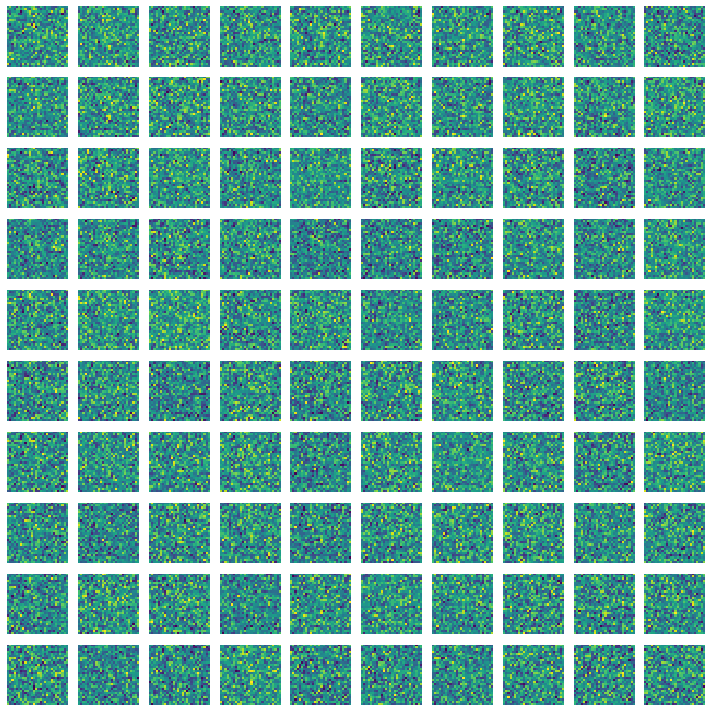

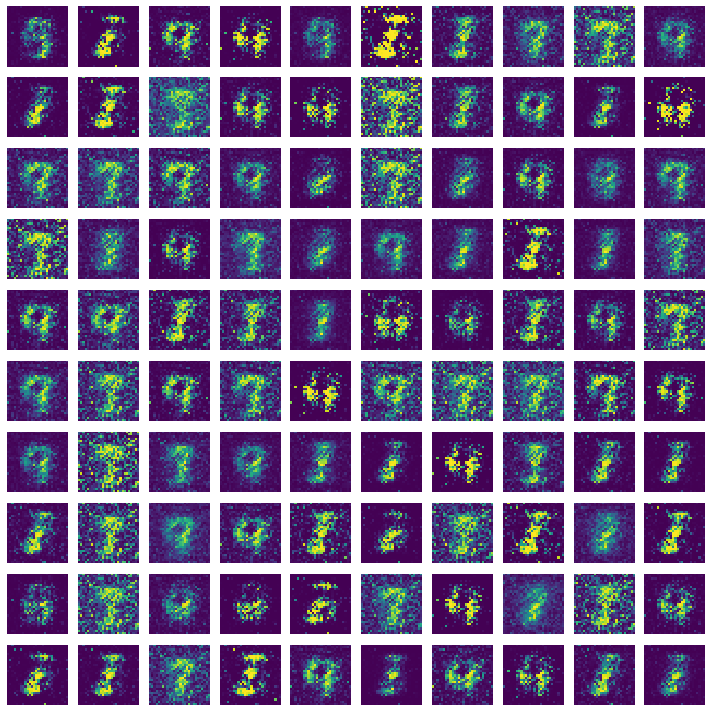

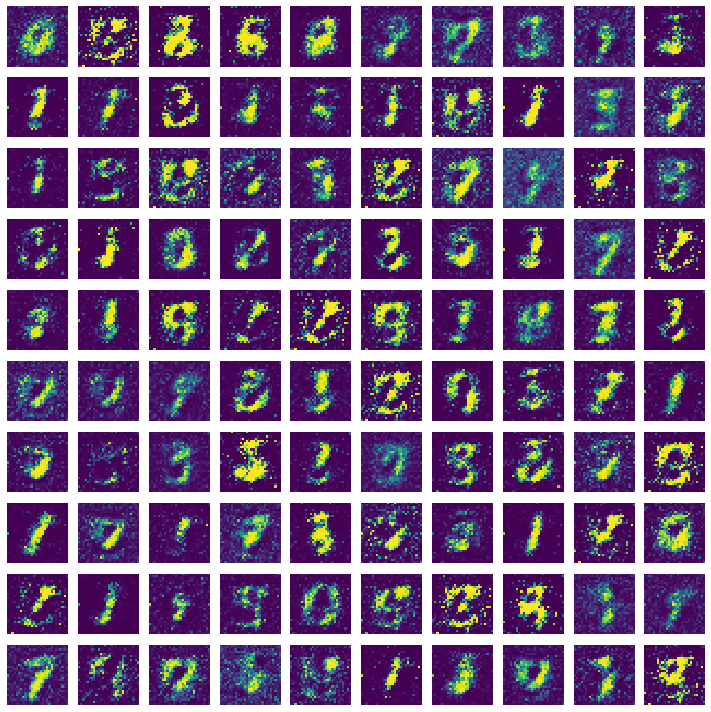

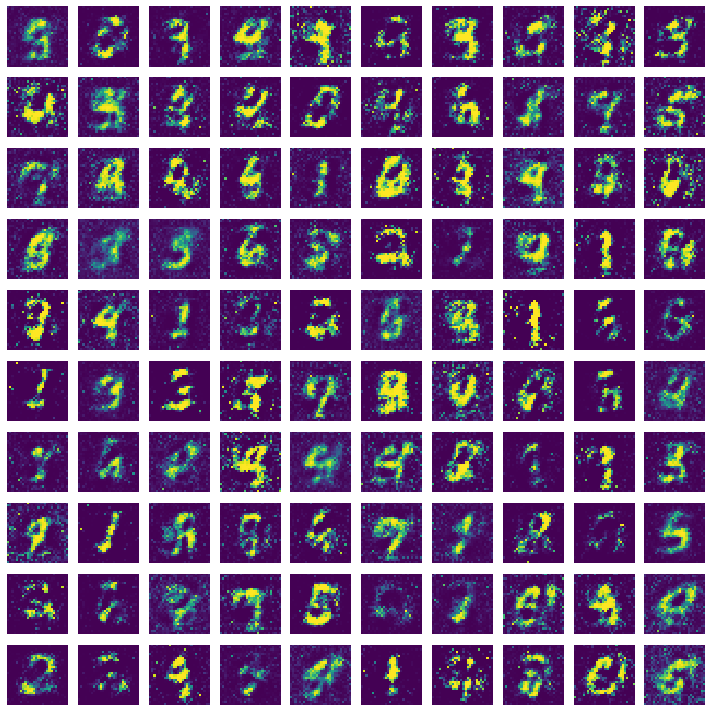

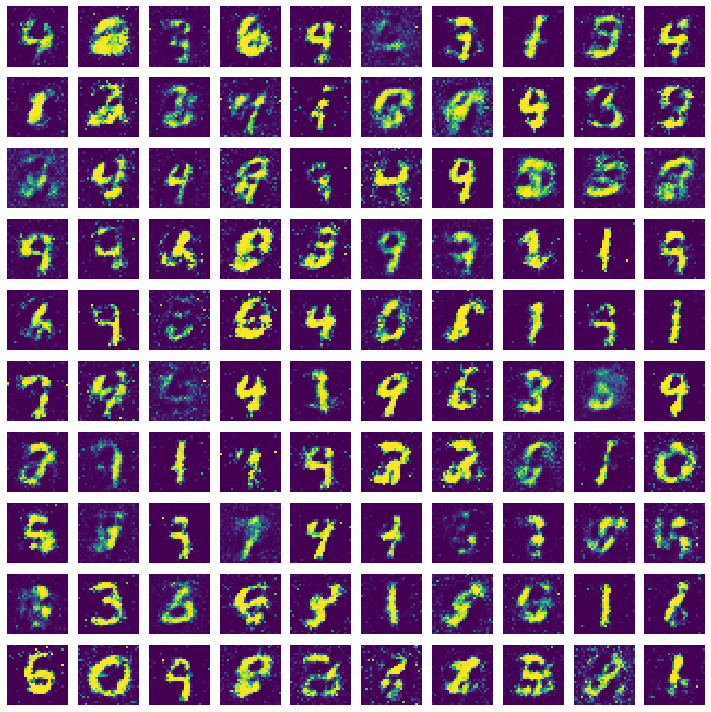

In [ ]:
for e in tqdm(range(epochs)):
    noise = np.random.normal(0, 1, [batch_size, 100])
    generated_images = g.predict(noise)
    image_batch = mnist_data[np.random.randint(low=0, 
                                               high=mnist_data.shape[0], 
                                               size=batch_size)]
    X = np.concatenate([image_batch, generated_images])
    y_dis = np.zeros(2 * batch_size)
    y_dis[:batch_size] = 1
    d.trainable = True
    d.train_on_batch(X, y_dis)
    noise = np.random.normal(0, 1, [batch_size, 100])
    y_gen = np.ones(batch_size)
    d.trainable = False
    gan.train_on_batch(noise, y_gen)
    if e == 0 or e % 1000 == 0:
        plot_generated_images(g)